In [1]:
import matplotlib.pyplot as plt       # matplotlib.pyplot importing
import numpy as np                    # Numpy importing
import pandas as pd                   # Pandas importing
from scipy.stats import pearsonr      # Used for the "earsonr(df['TV'],df['Sales'])[0])", Scipy personr covariance
import statsmodels.api as sm          # statsmodels.api importing
import statsmodels.formula.api as smf # statsmodels.formula.api importing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


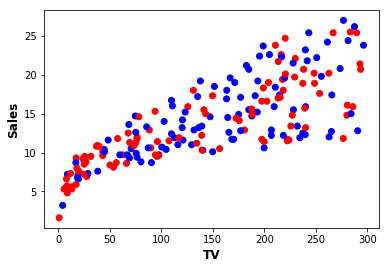

In [2]:
pd.set_option('display.max_rows',10)
pd.set_option('display.width',100)

df=pd.read_csv('Advertising.csv', sep=',', usecols=range(1,5)) # Reading cvs file omiting first column
#df=df.dropna()                  # Cleaning dataset from any row with at least one column with "NaN" values, this is optional

aColors=['red','blue'] # Selecting variables colors on the graph
xVariable=df['TV']     # Selecting our predictor variables
yVariable=df['Sales']  # Selecting our response variable
plt.scatter(xVariable,yVariable, c=aColors)         # Plotting graph, with selected colors
plt.xlabel('TV',size=12, fontweight='semibold')         # Setting x axis label with some properties
plt.ylabel('Sales',size=12, fontweight='semibold')      # Setting x axis label with some properties
plt.show()                                          # Showing in graph command, Printing result

In [3]:
def covariance(aVariable,bVariable,bias=0):                                                                                  #-
    aObservations=float(len(aVariable))                                                                                      #-
    return np.sum((aVariable-np.mean(aVariable))*(bVariable-np.mean(bVariable)))/(aObservations-min(bias,1))                 #-
#------------------------------------------------------------------------------------------------------------------------------
def standardize(cVariable):                                                                                                  #-
    return ((cVariable-np.mean(cVariable))/np.std(cVariable))                                                                #-
#------------------------------------------------------------------------------------------------------------------------------
def correlation(dVariable,eVariable,bias=0):                                                                                 #-
    return (covariance(standardize(dVariable),standardize(eVariable),bias))                                                  #-
                                                                                                                             #-
#------------------------------------------------------------------------------------------------------------------------------
#covariance(xVariable,yVariable)                                                                                             #-
print('Our correlation estimate: %0.5f' % (correlation(df['TV'],df['Sales'])))                                               #-
print('Correlation from Scipy personr estimation: %0.5f' % pearsonr(df['TV'],df['Sales'])[0])                                #-

Our correlation estimate: 0.78222
Correlation from Scipy personr estimation: 0.78222


Linear Model is:
Sales= 7.032593549127705 + 0.04753664043301969 *TV


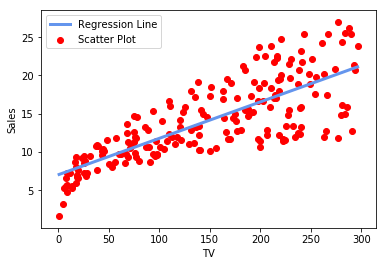

In [4]:
#-----------------REGRESSION ANALYSIS "Ordinary Least Square Method"-----------------------------------------------------------
observations = len(df)       # Total number of values                                                                        #-
xVarMean=df['TV'].mean()     # Cal. TV mean                                                                                  #-
yVarMean=df['Sales'].mean()  # Cal. Sales mean                                                                               #-
aNume = 0                    # Initializing variable                                                                         #-
aDeno = 0                    # Initializing variable                                                                         #-
for i in range(observations):  # Loop to go over observations to find b0 & b1 coefficients                                   #-
    aNume += (xVariable[i] - xVarMean) * (yVariable[i] - yVarMean)                                                           #-
    aDeno += (xVariable[i] - xVarMean) ** 2                                                                                  #-
b1 = aNume / aDeno             # b1 coefficient                                                                              #-
b0 = yVarMean - (b1 * xVarMean)# b0 coefficient                                                                              #-
print('Linear Model is:')                                                                                                    #-
print('Sales=',b0,'+',b1,'*TV')# Printing result                                                                             #-
#------------------------------------------------------------------------------------------------------------------------------
mAx_x = df['TV'].max() #+ 100
mIn_x = df['TV'].min() #- 100

# Calculating line values x and y
aX = np.linspace(mIn_x, mAx_x, 1000)
aY = b0+b1*aX

# Ploting Line
plt.plot(aX, aY, color='#6495ED', label='Regression Line',linewidth=3)
# Ploting Scatter Points
plt.scatter(xVariable, yVariable, c='red', label='Scatter Plot')

plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


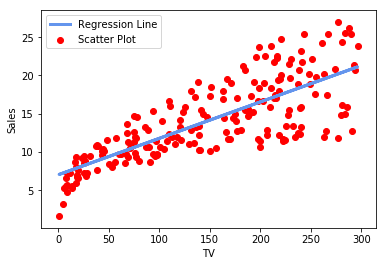

In [5]:
#-----------------REGRESSION ANALYSIS "scikit-learn approach Method"-----------------------------------------------------------
# Cannot use Rank 1 matrix in scikit learn
xVariable2 = xVariable.reshape((observations, 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(xVariable2, yVariable)
# Y Prediction
Y_pred = reg.predict(xVariable2)

# Calculating RMSE and R2 Score
mse = mean_squared_error(yVariable, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(xVariable2, yVariable)

#print(np.sqrt(mse))
#print(r2_score)

#aX = np.linspace(mIn_x, mAx_x, 1000)
aY = reg.predict(xVariable2)
plt.plot(xVariable, aY,label='Regression Line',color='#6495ED',linewidth=3)
# Ploting Scatter Points
plt.scatter(xVariable, yVariable,color='red', label='Scatter Plot')

plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()

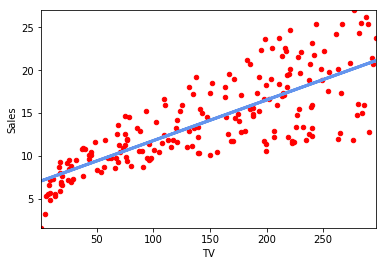

In [6]:
#-----------------REGRESSION ANALYSIS "statsmodels.formula.api Method"---------------------------------------------------------

x=df['TV']
y=df['Sales']
x=sm.add_constant(x)

linear_regression=smf.ols(formula='Sales ~ TV',data=df)
fitted_model=linear_regression.fit()
fitted_model.summary()

#-----------------------------------------------------------------------------------------------------------------------------
fitted_values=fitted_model.predict(x)                                                                                       #-
x_range=[df['TV'].min(),df['TV'].max()]                                                                                     #-
y_range=[df['Sales'].min(),df['Sales'].max()]                                                                               #-
scatter_plot=df.plot(kind='scatter',x='TV',y='Sales',color='red',xlim=x_range,ylim=y_range)                                 #-

#meanY=scatter_plot.plot(x_range,[df['Sales'].mean(),df['Sales'].mean()],'--', color='red', linewidth=1)                    #-
#meanX=scatter_plot.plot([df['TV'].mean(),df['TV'].mean()],'--',  color='red', linewidth=1)                                 #-
regression_line=scatter_plot.plot(df['TV'],fitted_values,'-',color='#6495ED', linewidth=3)                                  #-
#plt.legend()
#----------------------------------------------------------------------------------------------------------------------------

In [9]:
Xx=df['TV']
Yy=df['Sales']

def gradient_descent(x,y):
    m_curr = b_curr =0
    iterations = 50000
    n= len(x)
    learning_rate=0.01
    
    for i in range(iterations):
        y_predicted = m_curr*x + b_curr
        cost = (1/2*n)*sum([val**2 for val in (y - y_predicted)])
        md = -(1/n)*sum(x*(y-y_predicted))
        bd = -(1/n)*sum(y - y_predicted)
        m_curr = m_curr - learning_rate*md
        b_curr = b_curr - learning_rate*bd
        print("m {}, b {} , cost {}, i {}".format(m_curr,b_curr, cost, i))

gradient_descent(Xx,Yy)

m 24.105417, b 0.14022500000000002 , cost 4474325.000000001, i 0
m -6931.861540711555, b -35.16616004222501 , cost 334205162724.8131, i 1
m 2000305.4953445897, b 10158.108232558983 , cost 2.782883399634547e+16, i 2
m -577214904.1209416, b -2931242.540616835 , cost 2.3172743952583046e+21, i 3
m 166563087604.14102, b 845849295.4170499 , cost 1.9295672336517287e+26, i 4
m -48064008656298.06, b -244081137287.71597 , cost 1.6067280235784814e+31, i 5
m 1.386951311568036e+16, b 70432879602522.36 , cost 1.3379035965835443e+36, i 6
m -4.002233676379446e+18, b -2.0324350272317796e+16 , cost 1.1140566464786932e+41, i 7
m 1.1548981039742855e+21, b 5.864863346820647e+18 , cost 9.276619143058355e+45, i 8
m -3.332613081627937e+23, b -1.692384829823037e+21 , cost 7.724532051162855e+50, i 9
m 9.616701173565117e+25, b 4.8836029807375135e+23 , cost 6.432127318074916e+55, i 10
m -2.775027859413943e+28, b -1.4092290153630193e+26 , cost 5.355957042044678e+60, i 11
m 8.007714372670559e+30, b 4.06651897292665

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: overflow encountered in double_scalars
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: overflow encountered in double_scalars
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in double_scalars



m nan, b nan , cost nan, i 340
m nan, b nan , cost nan, i 341
m nan, b nan , cost nan, i 342
m nan, b nan , cost nan, i 343
m nan, b nan , cost nan, i 344
m nan, b nan , cost nan, i 345
m nan, b nan , cost nan, i 346
m nan, b nan , cost nan, i 347
m nan, b nan , cost nan, i 348
m nan, b nan , cost nan, i 349
m nan, b nan , cost nan, i 350
m nan, b nan , cost nan, i 351
m nan, b nan , cost nan, i 352
m nan, b nan , cost nan, i 353
m nan, b nan , cost nan, i 354
m nan, b nan , cost nan, i 355
m nan, b nan , cost nan, i 356
m nan, b nan , cost nan, i 357
m nan, b nan , cost nan, i 358
m nan, b nan , cost nan, i 359
m nan, b nan , cost nan, i 360
m nan, b nan , cost nan, i 361
m nan, b nan , cost nan, i 362
m nan, b nan , cost nan, i 363
m nan, b nan , cost nan, i 364
m nan, b nan , cost nan, i 365
m nan, b nan , cost nan, i 366
m nan, b nan , cost nan, i 367
m nan, b nan , cost nan, i 368
m nan, b nan , cost nan, i 369
m nan, b nan , cost nan, i 370
m nan, b nan , cost nan, i 371
m nan, 

m nan, b nan , cost nan, i 628
m nan, b nan , cost nan, i 629
m nan, b nan , cost nan, i 630
m nan, b nan , cost nan, i 631
m nan, b nan , cost nan, i 632
m nan, b nan , cost nan, i 633
m nan, b nan , cost nan, i 634
m nan, b nan , cost nan, i 635
m nan, b nan , cost nan, i 636
m nan, b nan , cost nan, i 637
m nan, b nan , cost nan, i 638
m nan, b nan , cost nan, i 639
m nan, b nan , cost nan, i 640
m nan, b nan , cost nan, i 641
m nan, b nan , cost nan, i 642
m nan, b nan , cost nan, i 643
m nan, b nan , cost nan, i 644
m nan, b nan , cost nan, i 645
m nan, b nan , cost nan, i 646
m nan, b nan , cost nan, i 647
m nan, b nan , cost nan, i 648
m nan, b nan , cost nan, i 649
m nan, b nan , cost nan, i 650
m nan, b nan , cost nan, i 651
m nan, b nan , cost nan, i 652
m nan, b nan , cost nan, i 653
m nan, b nan , cost nan, i 654
m nan, b nan , cost nan, i 655
m nan, b nan , cost nan, i 656
m nan, b nan , cost nan, i 657
m nan, b nan , cost nan, i 658
m nan, b nan , cost nan, i 659
m nan, b

m nan, b nan , cost nan, i 983
m nan, b nan , cost nan, i 984
m nan, b nan , cost nan, i 985
m nan, b nan , cost nan, i 986
m nan, b nan , cost nan, i 987
m nan, b nan , cost nan, i 988
m nan, b nan , cost nan, i 989
m nan, b nan , cost nan, i 990
m nan, b nan , cost nan, i 991
m nan, b nan , cost nan, i 992
m nan, b nan , cost nan, i 993
m nan, b nan , cost nan, i 994
m nan, b nan , cost nan, i 995
m nan, b nan , cost nan, i 996
m nan, b nan , cost nan, i 997
m nan, b nan , cost nan, i 998
m nan, b nan , cost nan, i 999
m nan, b nan , cost nan, i 1000
m nan, b nan , cost nan, i 1001
m nan, b nan , cost nan, i 1002
m nan, b nan , cost nan, i 1003
m nan, b nan , cost nan, i 1004
m nan, b nan , cost nan, i 1005
m nan, b nan , cost nan, i 1006
m nan, b nan , cost nan, i 1007
m nan, b nan , cost nan, i 1008
m nan, b nan , cost nan, i 1009
m nan, b nan , cost nan, i 1010
m nan, b nan , cost nan, i 1011
m nan, b nan , cost nan, i 1012
m nan, b nan , cost nan, i 1013
m nan, b nan , cost nan, 

m nan, b nan , cost nan, i 1681
m nan, b nan , cost nan, i 1682
m nan, b nan , cost nan, i 1683
m nan, b nan , cost nan, i 1684
m nan, b nan , cost nan, i 1685
m nan, b nan , cost nan, i 1686
m nan, b nan , cost nan, i 1687
m nan, b nan , cost nan, i 1688
m nan, b nan , cost nan, i 1689
m nan, b nan , cost nan, i 1690
m nan, b nan , cost nan, i 1691
m nan, b nan , cost nan, i 1692
m nan, b nan , cost nan, i 1693
m nan, b nan , cost nan, i 1694
m nan, b nan , cost nan, i 1695
m nan, b nan , cost nan, i 1696
m nan, b nan , cost nan, i 1697
m nan, b nan , cost nan, i 1698
m nan, b nan , cost nan, i 1699
m nan, b nan , cost nan, i 1700
m nan, b nan , cost nan, i 1701
m nan, b nan , cost nan, i 1702
m nan, b nan , cost nan, i 1703
m nan, b nan , cost nan, i 1704
m nan, b nan , cost nan, i 1705
m nan, b nan , cost nan, i 1706
m nan, b nan , cost nan, i 1707
m nan, b nan , cost nan, i 1708
m nan, b nan , cost nan, i 1709
m nan, b nan , cost nan, i 1710
m nan, b nan , cost nan, i 1711
m nan, b

m nan, b nan , cost nan, i 2003
m nan, b nan , cost nan, i 2004
m nan, b nan , cost nan, i 2005
m nan, b nan , cost nan, i 2006
m nan, b nan , cost nan, i 2007
m nan, b nan , cost nan, i 2008
m nan, b nan , cost nan, i 2009
m nan, b nan , cost nan, i 2010
m nan, b nan , cost nan, i 2011
m nan, b nan , cost nan, i 2012
m nan, b nan , cost nan, i 2013
m nan, b nan , cost nan, i 2014
m nan, b nan , cost nan, i 2015
m nan, b nan , cost nan, i 2016
m nan, b nan , cost nan, i 2017
m nan, b nan , cost nan, i 2018
m nan, b nan , cost nan, i 2019
m nan, b nan , cost nan, i 2020
m nan, b nan , cost nan, i 2021
m nan, b nan , cost nan, i 2022
m nan, b nan , cost nan, i 2023
m nan, b nan , cost nan, i 2024
m nan, b nan , cost nan, i 2025
m nan, b nan , cost nan, i 2026
m nan, b nan , cost nan, i 2027
m nan, b nan , cost nan, i 2028
m nan, b nan , cost nan, i 2029
m nan, b nan , cost nan, i 2030
m nan, b nan , cost nan, i 2031
m nan, b nan , cost nan, i 2032
m nan, b nan , cost nan, i 2033
m nan, b

m nan, b nan , cost nan, i 2428
m nan, b nan , cost nan, i 2429
m nan, b nan , cost nan, i 2430
m nan, b nan , cost nan, i 2431
m nan, b nan , cost nan, i 2432
m nan, b nan , cost nan, i 2433
m nan, b nan , cost nan, i 2434
m nan, b nan , cost nan, i 2435
m nan, b nan , cost nan, i 2436
m nan, b nan , cost nan, i 2437
m nan, b nan , cost nan, i 2438
m nan, b nan , cost nan, i 2439
m nan, b nan , cost nan, i 2440
m nan, b nan , cost nan, i 2441
m nan, b nan , cost nan, i 2442
m nan, b nan , cost nan, i 2443
m nan, b nan , cost nan, i 2444
m nan, b nan , cost nan, i 2445
m nan, b nan , cost nan, i 2446
m nan, b nan , cost nan, i 2447
m nan, b nan , cost nan, i 2448
m nan, b nan , cost nan, i 2449
m nan, b nan , cost nan, i 2450
m nan, b nan , cost nan, i 2451
m nan, b nan , cost nan, i 2452
m nan, b nan , cost nan, i 2453
m nan, b nan , cost nan, i 2454
m nan, b nan , cost nan, i 2455
m nan, b nan , cost nan, i 2456
m nan, b nan , cost nan, i 2457
m nan, b nan , cost nan, i 2458
m nan, b

m nan, b nan , cost nan, i 2930
m nan, b nan , cost nan, i 2931
m nan, b nan , cost nan, i 2932
m nan, b nan , cost nan, i 2933
m nan, b nan , cost nan, i 2934
m nan, b nan , cost nan, i 2935
m nan, b nan , cost nan, i 2936
m nan, b nan , cost nan, i 2937
m nan, b nan , cost nan, i 2938
m nan, b nan , cost nan, i 2939
m nan, b nan , cost nan, i 2940
m nan, b nan , cost nan, i 2941
m nan, b nan , cost nan, i 2942
m nan, b nan , cost nan, i 2943
m nan, b nan , cost nan, i 2944
m nan, b nan , cost nan, i 2945
m nan, b nan , cost nan, i 2946
m nan, b nan , cost nan, i 2947
m nan, b nan , cost nan, i 2948
m nan, b nan , cost nan, i 2949
m nan, b nan , cost nan, i 2950
m nan, b nan , cost nan, i 2951
m nan, b nan , cost nan, i 2952
m nan, b nan , cost nan, i 2953
m nan, b nan , cost nan, i 2954
m nan, b nan , cost nan, i 2955
m nan, b nan , cost nan, i 2956
m nan, b nan , cost nan, i 2957
m nan, b nan , cost nan, i 2958
m nan, b nan , cost nan, i 2959
m nan, b nan , cost nan, i 2960
m nan, b

m nan, b nan , cost nan, i 3474
m nan, b nan , cost nan, i 3475
m nan, b nan , cost nan, i 3476
m nan, b nan , cost nan, i 3477
m nan, b nan , cost nan, i 3478
m nan, b nan , cost nan, i 3479
m nan, b nan , cost nan, i 3480
m nan, b nan , cost nan, i 3481
m nan, b nan , cost nan, i 3482
m nan, b nan , cost nan, i 3483
m nan, b nan , cost nan, i 3484
m nan, b nan , cost nan, i 3485
m nan, b nan , cost nan, i 3486
m nan, b nan , cost nan, i 3487
m nan, b nan , cost nan, i 3488
m nan, b nan , cost nan, i 3489
m nan, b nan , cost nan, i 3490
m nan, b nan , cost nan, i 3491
m nan, b nan , cost nan, i 3492
m nan, b nan , cost nan, i 3493
m nan, b nan , cost nan, i 3494
m nan, b nan , cost nan, i 3495
m nan, b nan , cost nan, i 3496
m nan, b nan , cost nan, i 3497
m nan, b nan , cost nan, i 3498
m nan, b nan , cost nan, i 3499
m nan, b nan , cost nan, i 3500
m nan, b nan , cost nan, i 3501
m nan, b nan , cost nan, i 3502
m nan, b nan , cost nan, i 3503
m nan, b nan , cost nan, i 3504
m nan, b

m nan, b nan , cost nan, i 3737
m nan, b nan , cost nan, i 3738
m nan, b nan , cost nan, i 3739
m nan, b nan , cost nan, i 3740
m nan, b nan , cost nan, i 3741
m nan, b nan , cost nan, i 3742
m nan, b nan , cost nan, i 3743
m nan, b nan , cost nan, i 3744
m nan, b nan , cost nan, i 3745
m nan, b nan , cost nan, i 3746
m nan, b nan , cost nan, i 3747
m nan, b nan , cost nan, i 3748
m nan, b nan , cost nan, i 3749
m nan, b nan , cost nan, i 3750
m nan, b nan , cost nan, i 3751
m nan, b nan , cost nan, i 3752
m nan, b nan , cost nan, i 3753
m nan, b nan , cost nan, i 3754
m nan, b nan , cost nan, i 3755
m nan, b nan , cost nan, i 3756
m nan, b nan , cost nan, i 3757
m nan, b nan , cost nan, i 3758
m nan, b nan , cost nan, i 3759
m nan, b nan , cost nan, i 3760
m nan, b nan , cost nan, i 3761
m nan, b nan , cost nan, i 3762
m nan, b nan , cost nan, i 3763
m nan, b nan , cost nan, i 3764
m nan, b nan , cost nan, i 3765
m nan, b nan , cost nan, i 3766
m nan, b nan , cost nan, i 3767
m nan, b

m nan, b nan , cost nan, i 4051
m nan, b nan , cost nan, i 4052
m nan, b nan , cost nan, i 4053
m nan, b nan , cost nan, i 4054
m nan, b nan , cost nan, i 4055
m nan, b nan , cost nan, i 4056
m nan, b nan , cost nan, i 4057
m nan, b nan , cost nan, i 4058
m nan, b nan , cost nan, i 4059
m nan, b nan , cost nan, i 4060
m nan, b nan , cost nan, i 4061
m nan, b nan , cost nan, i 4062
m nan, b nan , cost nan, i 4063
m nan, b nan , cost nan, i 4064
m nan, b nan , cost nan, i 4065
m nan, b nan , cost nan, i 4066
m nan, b nan , cost nan, i 4067
m nan, b nan , cost nan, i 4068
m nan, b nan , cost nan, i 4069
m nan, b nan , cost nan, i 4070
m nan, b nan , cost nan, i 4071
m nan, b nan , cost nan, i 4072
m nan, b nan , cost nan, i 4073
m nan, b nan , cost nan, i 4074
m nan, b nan , cost nan, i 4075
m nan, b nan , cost nan, i 4076
m nan, b nan , cost nan, i 4077
m nan, b nan , cost nan, i 4078
m nan, b nan , cost nan, i 4079
m nan, b nan , cost nan, i 4080
m nan, b nan , cost nan, i 4081
m nan, b

m nan, b nan , cost nan, i 4313
m nan, b nan , cost nan, i 4314
m nan, b nan , cost nan, i 4315
m nan, b nan , cost nan, i 4316
m nan, b nan , cost nan, i 4317
m nan, b nan , cost nan, i 4318
m nan, b nan , cost nan, i 4319
m nan, b nan , cost nan, i 4320
m nan, b nan , cost nan, i 4321
m nan, b nan , cost nan, i 4322
m nan, b nan , cost nan, i 4323
m nan, b nan , cost nan, i 4324
m nan, b nan , cost nan, i 4325
m nan, b nan , cost nan, i 4326
m nan, b nan , cost nan, i 4327
m nan, b nan , cost nan, i 4328
m nan, b nan , cost nan, i 4329
m nan, b nan , cost nan, i 4330
m nan, b nan , cost nan, i 4331
m nan, b nan , cost nan, i 4332
m nan, b nan , cost nan, i 4333
m nan, b nan , cost nan, i 4334
m nan, b nan , cost nan, i 4335
m nan, b nan , cost nan, i 4336
m nan, b nan , cost nan, i 4337
m nan, b nan , cost nan, i 4338
m nan, b nan , cost nan, i 4339
m nan, b nan , cost nan, i 4340
m nan, b nan , cost nan, i 4341
m nan, b nan , cost nan, i 4342
m nan, b nan , cost nan, i 4343
m nan, b

m nan, b nan , cost nan, i 4832
m nan, b nan , cost nan, i 4833
m nan, b nan , cost nan, i 4834
m nan, b nan , cost nan, i 4835
m nan, b nan , cost nan, i 4836
m nan, b nan , cost nan, i 4837
m nan, b nan , cost nan, i 4838
m nan, b nan , cost nan, i 4839
m nan, b nan , cost nan, i 4840
m nan, b nan , cost nan, i 4841
m nan, b nan , cost nan, i 4842
m nan, b nan , cost nan, i 4843
m nan, b nan , cost nan, i 4844
m nan, b nan , cost nan, i 4845
m nan, b nan , cost nan, i 4846
m nan, b nan , cost nan, i 4847
m nan, b nan , cost nan, i 4848
m nan, b nan , cost nan, i 4849
m nan, b nan , cost nan, i 4850
m nan, b nan , cost nan, i 4851
m nan, b nan , cost nan, i 4852
m nan, b nan , cost nan, i 4853
m nan, b nan , cost nan, i 4854
m nan, b nan , cost nan, i 4855
m nan, b nan , cost nan, i 4856
m nan, b nan , cost nan, i 4857
m nan, b nan , cost nan, i 4858
m nan, b nan , cost nan, i 4859
m nan, b nan , cost nan, i 4860
m nan, b nan , cost nan, i 4861
m nan, b nan , cost nan, i 4862
m nan, b

m nan, b nan , cost nan, i 5331
m nan, b nan , cost nan, i 5332
m nan, b nan , cost nan, i 5333
m nan, b nan , cost nan, i 5334
m nan, b nan , cost nan, i 5335
m nan, b nan , cost nan, i 5336
m nan, b nan , cost nan, i 5337
m nan, b nan , cost nan, i 5338
m nan, b nan , cost nan, i 5339
m nan, b nan , cost nan, i 5340
m nan, b nan , cost nan, i 5341
m nan, b nan , cost nan, i 5342
m nan, b nan , cost nan, i 5343
m nan, b nan , cost nan, i 5344
m nan, b nan , cost nan, i 5345
m nan, b nan , cost nan, i 5346
m nan, b nan , cost nan, i 5347
m nan, b nan , cost nan, i 5348
m nan, b nan , cost nan, i 5349
m nan, b nan , cost nan, i 5350
m nan, b nan , cost nan, i 5351
m nan, b nan , cost nan, i 5352
m nan, b nan , cost nan, i 5353
m nan, b nan , cost nan, i 5354
m nan, b nan , cost nan, i 5355
m nan, b nan , cost nan, i 5356
m nan, b nan , cost nan, i 5357
m nan, b nan , cost nan, i 5358
m nan, b nan , cost nan, i 5359
m nan, b nan , cost nan, i 5360
m nan, b nan , cost nan, i 5361
m nan, b

m nan, b nan , cost nan, i 6071
m nan, b nan , cost nan, i 6072
m nan, b nan , cost nan, i 6073
m nan, b nan , cost nan, i 6074
m nan, b nan , cost nan, i 6075
m nan, b nan , cost nan, i 6076
m nan, b nan , cost nan, i 6077
m nan, b nan , cost nan, i 6078
m nan, b nan , cost nan, i 6079
m nan, b nan , cost nan, i 6080
m nan, b nan , cost nan, i 6081
m nan, b nan , cost nan, i 6082
m nan, b nan , cost nan, i 6083
m nan, b nan , cost nan, i 6084
m nan, b nan , cost nan, i 6085
m nan, b nan , cost nan, i 6086
m nan, b nan , cost nan, i 6087
m nan, b nan , cost nan, i 6088
m nan, b nan , cost nan, i 6089
m nan, b nan , cost nan, i 6090
m nan, b nan , cost nan, i 6091
m nan, b nan , cost nan, i 6092
m nan, b nan , cost nan, i 6093
m nan, b nan , cost nan, i 6094
m nan, b nan , cost nan, i 6095
m nan, b nan , cost nan, i 6096
m nan, b nan , cost nan, i 6097
m nan, b nan , cost nan, i 6098
m nan, b nan , cost nan, i 6099
m nan, b nan , cost nan, i 6100
m nan, b nan , cost nan, i 6101
m nan, b

m nan, b nan , cost nan, i 6330
m nan, b nan , cost nan, i 6331
m nan, b nan , cost nan, i 6332
m nan, b nan , cost nan, i 6333
m nan, b nan , cost nan, i 6334
m nan, b nan , cost nan, i 6335
m nan, b nan , cost nan, i 6336
m nan, b nan , cost nan, i 6337
m nan, b nan , cost nan, i 6338
m nan, b nan , cost nan, i 6339
m nan, b nan , cost nan, i 6340
m nan, b nan , cost nan, i 6341
m nan, b nan , cost nan, i 6342
m nan, b nan , cost nan, i 6343
m nan, b nan , cost nan, i 6344
m nan, b nan , cost nan, i 6345
m nan, b nan , cost nan, i 6346
m nan, b nan , cost nan, i 6347
m nan, b nan , cost nan, i 6348
m nan, b nan , cost nan, i 6349
m nan, b nan , cost nan, i 6350
m nan, b nan , cost nan, i 6351
m nan, b nan , cost nan, i 6352
m nan, b nan , cost nan, i 6353
m nan, b nan , cost nan, i 6354
m nan, b nan , cost nan, i 6355
m nan, b nan , cost nan, i 6356
m nan, b nan , cost nan, i 6357
m nan, b nan , cost nan, i 6358
m nan, b nan , cost nan, i 6359
m nan, b nan , cost nan, i 6360
m nan, b

m nan, b nan , cost nan, i 6753
m nan, b nan , cost nan, i 6754
m nan, b nan , cost nan, i 6755
m nan, b nan , cost nan, i 6756
m nan, b nan , cost nan, i 6757
m nan, b nan , cost nan, i 6758
m nan, b nan , cost nan, i 6759
m nan, b nan , cost nan, i 6760
m nan, b nan , cost nan, i 6761
m nan, b nan , cost nan, i 6762
m nan, b nan , cost nan, i 6763
m nan, b nan , cost nan, i 6764
m nan, b nan , cost nan, i 6765
m nan, b nan , cost nan, i 6766
m nan, b nan , cost nan, i 6767
m nan, b nan , cost nan, i 6768
m nan, b nan , cost nan, i 6769
m nan, b nan , cost nan, i 6770
m nan, b nan , cost nan, i 6771
m nan, b nan , cost nan, i 6772
m nan, b nan , cost nan, i 6773
m nan, b nan , cost nan, i 6774
m nan, b nan , cost nan, i 6775
m nan, b nan , cost nan, i 6776
m nan, b nan , cost nan, i 6777
m nan, b nan , cost nan, i 6778
m nan, b nan , cost nan, i 6779
m nan, b nan , cost nan, i 6780
m nan, b nan , cost nan, i 6781
m nan, b nan , cost nan, i 6782
m nan, b nan , cost nan, i 6783
m nan, b

m nan, b nan , cost nan, i 7329
m nan, b nan , cost nan, i 7330
m nan, b nan , cost nan, i 7331
m nan, b nan , cost nan, i 7332
m nan, b nan , cost nan, i 7333
m nan, b nan , cost nan, i 7334
m nan, b nan , cost nan, i 7335
m nan, b nan , cost nan, i 7336
m nan, b nan , cost nan, i 7337
m nan, b nan , cost nan, i 7338
m nan, b nan , cost nan, i 7339
m nan, b nan , cost nan, i 7340
m nan, b nan , cost nan, i 7341
m nan, b nan , cost nan, i 7342
m nan, b nan , cost nan, i 7343
m nan, b nan , cost nan, i 7344
m nan, b nan , cost nan, i 7345
m nan, b nan , cost nan, i 7346
m nan, b nan , cost nan, i 7347
m nan, b nan , cost nan, i 7348
m nan, b nan , cost nan, i 7349
m nan, b nan , cost nan, i 7350
m nan, b nan , cost nan, i 7351
m nan, b nan , cost nan, i 7352
m nan, b nan , cost nan, i 7353
m nan, b nan , cost nan, i 7354
m nan, b nan , cost nan, i 7355
m nan, b nan , cost nan, i 7356
m nan, b nan , cost nan, i 7357
m nan, b nan , cost nan, i 7358
m nan, b nan , cost nan, i 7359
m nan, b

m nan, b nan , cost nan, i 7762
m nan, b nan , cost nan, i 7763
m nan, b nan , cost nan, i 7764
m nan, b nan , cost nan, i 7765
m nan, b nan , cost nan, i 7766
m nan, b nan , cost nan, i 7767
m nan, b nan , cost nan, i 7768
m nan, b nan , cost nan, i 7769
m nan, b nan , cost nan, i 7770
m nan, b nan , cost nan, i 7771
m nan, b nan , cost nan, i 7772
m nan, b nan , cost nan, i 7773
m nan, b nan , cost nan, i 7774
m nan, b nan , cost nan, i 7775
m nan, b nan , cost nan, i 7776
m nan, b nan , cost nan, i 7777
m nan, b nan , cost nan, i 7778
m nan, b nan , cost nan, i 7779
m nan, b nan , cost nan, i 7780
m nan, b nan , cost nan, i 7781
m nan, b nan , cost nan, i 7782
m nan, b nan , cost nan, i 7783
m nan, b nan , cost nan, i 7784
m nan, b nan , cost nan, i 7785
m nan, b nan , cost nan, i 7786
m nan, b nan , cost nan, i 7787
m nan, b nan , cost nan, i 7788
m nan, b nan , cost nan, i 7789
m nan, b nan , cost nan, i 7790
m nan, b nan , cost nan, i 7791
m nan, b nan , cost nan, i 7792
m nan, b

m nan, b nan , cost nan, i 8328
m nan, b nan , cost nan, i 8329
m nan, b nan , cost nan, i 8330
m nan, b nan , cost nan, i 8331
m nan, b nan , cost nan, i 8332
m nan, b nan , cost nan, i 8333
m nan, b nan , cost nan, i 8334
m nan, b nan , cost nan, i 8335
m nan, b nan , cost nan, i 8336
m nan, b nan , cost nan, i 8337
m nan, b nan , cost nan, i 8338
m nan, b nan , cost nan, i 8339
m nan, b nan , cost nan, i 8340
m nan, b nan , cost nan, i 8341
m nan, b nan , cost nan, i 8342
m nan, b nan , cost nan, i 8343
m nan, b nan , cost nan, i 8344
m nan, b nan , cost nan, i 8345
m nan, b nan , cost nan, i 8346
m nan, b nan , cost nan, i 8347
m nan, b nan , cost nan, i 8348
m nan, b nan , cost nan, i 8349
m nan, b nan , cost nan, i 8350
m nan, b nan , cost nan, i 8351
m nan, b nan , cost nan, i 8352
m nan, b nan , cost nan, i 8353
m nan, b nan , cost nan, i 8354
m nan, b nan , cost nan, i 8355
m nan, b nan , cost nan, i 8356
m nan, b nan , cost nan, i 8357
m nan, b nan , cost nan, i 8358
m nan, b

m nan, b nan , cost nan, i 8827
m nan, b nan , cost nan, i 8828
m nan, b nan , cost nan, i 8829
m nan, b nan , cost nan, i 8830
m nan, b nan , cost nan, i 8831
m nan, b nan , cost nan, i 8832
m nan, b nan , cost nan, i 8833
m nan, b nan , cost nan, i 8834
m nan, b nan , cost nan, i 8835
m nan, b nan , cost nan, i 8836
m nan, b nan , cost nan, i 8837
m nan, b nan , cost nan, i 8838
m nan, b nan , cost nan, i 8839
m nan, b nan , cost nan, i 8840
m nan, b nan , cost nan, i 8841
m nan, b nan , cost nan, i 8842
m nan, b nan , cost nan, i 8843
m nan, b nan , cost nan, i 8844
m nan, b nan , cost nan, i 8845
m nan, b nan , cost nan, i 8846
m nan, b nan , cost nan, i 8847
m nan, b nan , cost nan, i 8848
m nan, b nan , cost nan, i 8849
m nan, b nan , cost nan, i 8850
m nan, b nan , cost nan, i 8851
m nan, b nan , cost nan, i 8852
m nan, b nan , cost nan, i 8853
m nan, b nan , cost nan, i 8854
m nan, b nan , cost nan, i 8855
m nan, b nan , cost nan, i 8856
m nan, b nan , cost nan, i 8857
m nan, b

m nan, b nan , cost nan, i 9327
m nan, b nan , cost nan, i 9328
m nan, b nan , cost nan, i 9329
m nan, b nan , cost nan, i 9330
m nan, b nan , cost nan, i 9331
m nan, b nan , cost nan, i 9332
m nan, b nan , cost nan, i 9333
m nan, b nan , cost nan, i 9334
m nan, b nan , cost nan, i 9335
m nan, b nan , cost nan, i 9336
m nan, b nan , cost nan, i 9337
m nan, b nan , cost nan, i 9338
m nan, b nan , cost nan, i 9339
m nan, b nan , cost nan, i 9340
m nan, b nan , cost nan, i 9341
m nan, b nan , cost nan, i 9342
m nan, b nan , cost nan, i 9343
m nan, b nan , cost nan, i 9344
m nan, b nan , cost nan, i 9345
m nan, b nan , cost nan, i 9346
m nan, b nan , cost nan, i 9347
m nan, b nan , cost nan, i 9348
m nan, b nan , cost nan, i 9349
m nan, b nan , cost nan, i 9350
m nan, b nan , cost nan, i 9351
m nan, b nan , cost nan, i 9352
m nan, b nan , cost nan, i 9353
m nan, b nan , cost nan, i 9354
m nan, b nan , cost nan, i 9355
m nan, b nan , cost nan, i 9356
m nan, b nan , cost nan, i 9357
m nan, b

m nan, b nan , cost nan, i 10326
m nan, b nan , cost nan, i 10327
m nan, b nan , cost nan, i 10328
m nan, b nan , cost nan, i 10329
m nan, b nan , cost nan, i 10330
m nan, b nan , cost nan, i 10331
m nan, b nan , cost nan, i 10332
m nan, b nan , cost nan, i 10333
m nan, b nan , cost nan, i 10334
m nan, b nan , cost nan, i 10335
m nan, b nan , cost nan, i 10336
m nan, b nan , cost nan, i 10337
m nan, b nan , cost nan, i 10338
m nan, b nan , cost nan, i 10339
m nan, b nan , cost nan, i 10340
m nan, b nan , cost nan, i 10341
m nan, b nan , cost nan, i 10342
m nan, b nan , cost nan, i 10343
m nan, b nan , cost nan, i 10344
m nan, b nan , cost nan, i 10345
m nan, b nan , cost nan, i 10346
m nan, b nan , cost nan, i 10347
m nan, b nan , cost nan, i 10348
m nan, b nan , cost nan, i 10349
m nan, b nan , cost nan, i 10350
m nan, b nan , cost nan, i 10351
m nan, b nan , cost nan, i 10352
m nan, b nan , cost nan, i 10353
m nan, b nan , cost nan, i 10354
m nan, b nan , cost nan, i 10355
m nan, b n

m nan, b nan , cost nan, i 10826
m nan, b nan , cost nan, i 10827
m nan, b nan , cost nan, i 10828
m nan, b nan , cost nan, i 10829
m nan, b nan , cost nan, i 10830
m nan, b nan , cost nan, i 10831
m nan, b nan , cost nan, i 10832
m nan, b nan , cost nan, i 10833
m nan, b nan , cost nan, i 10834
m nan, b nan , cost nan, i 10835
m nan, b nan , cost nan, i 10836
m nan, b nan , cost nan, i 10837
m nan, b nan , cost nan, i 10838
m nan, b nan , cost nan, i 10839
m nan, b nan , cost nan, i 10840
m nan, b nan , cost nan, i 10841
m nan, b nan , cost nan, i 10842
m nan, b nan , cost nan, i 10843
m nan, b nan , cost nan, i 10844
m nan, b nan , cost nan, i 10845
m nan, b nan , cost nan, i 10846
m nan, b nan , cost nan, i 10847
m nan, b nan , cost nan, i 10848
m nan, b nan , cost nan, i 10849
m nan, b nan , cost nan, i 10850
m nan, b nan , cost nan, i 10851
m nan, b nan , cost nan, i 10852
m nan, b nan , cost nan, i 10853
m nan, b nan , cost nan, i 10854
m nan, b nan , cost nan, i 10855
m nan, b n

m nan, b nan , cost nan, i 11293
m nan, b nan , cost nan, i 11294
m nan, b nan , cost nan, i 11295
m nan, b nan , cost nan, i 11296
m nan, b nan , cost nan, i 11297
m nan, b nan , cost nan, i 11298
m nan, b nan , cost nan, i 11299
m nan, b nan , cost nan, i 11300
m nan, b nan , cost nan, i 11301
m nan, b nan , cost nan, i 11302
m nan, b nan , cost nan, i 11303
m nan, b nan , cost nan, i 11304
m nan, b nan , cost nan, i 11305
m nan, b nan , cost nan, i 11306
m nan, b nan , cost nan, i 11307
m nan, b nan , cost nan, i 11308
m nan, b nan , cost nan, i 11309
m nan, b nan , cost nan, i 11310
m nan, b nan , cost nan, i 11311
m nan, b nan , cost nan, i 11312
m nan, b nan , cost nan, i 11313
m nan, b nan , cost nan, i 11314
m nan, b nan , cost nan, i 11315
m nan, b nan , cost nan, i 11316
m nan, b nan , cost nan, i 11317
m nan, b nan , cost nan, i 11318
m nan, b nan , cost nan, i 11319
m nan, b nan , cost nan, i 11320
m nan, b nan , cost nan, i 11321
m nan, b nan , cost nan, i 11322
m nan, b n

m nan, b nan , cost nan, i 11825
m nan, b nan , cost nan, i 11826
m nan, b nan , cost nan, i 11827
m nan, b nan , cost nan, i 11828
m nan, b nan , cost nan, i 11829
m nan, b nan , cost nan, i 11830
m nan, b nan , cost nan, i 11831
m nan, b nan , cost nan, i 11832
m nan, b nan , cost nan, i 11833
m nan, b nan , cost nan, i 11834
m nan, b nan , cost nan, i 11835
m nan, b nan , cost nan, i 11836
m nan, b nan , cost nan, i 11837
m nan, b nan , cost nan, i 11838
m nan, b nan , cost nan, i 11839
m nan, b nan , cost nan, i 11840
m nan, b nan , cost nan, i 11841
m nan, b nan , cost nan, i 11842
m nan, b nan , cost nan, i 11843
m nan, b nan , cost nan, i 11844
m nan, b nan , cost nan, i 11845
m nan, b nan , cost nan, i 11846
m nan, b nan , cost nan, i 11847
m nan, b nan , cost nan, i 11848
m nan, b nan , cost nan, i 11849
m nan, b nan , cost nan, i 11850
m nan, b nan , cost nan, i 11851
m nan, b nan , cost nan, i 11852
m nan, b nan , cost nan, i 11853
m nan, b nan , cost nan, i 11854
m nan, b n

m nan, b nan , cost nan, i 12284
m nan, b nan , cost nan, i 12285
m nan, b nan , cost nan, i 12286
m nan, b nan , cost nan, i 12287
m nan, b nan , cost nan, i 12288
m nan, b nan , cost nan, i 12289
m nan, b nan , cost nan, i 12290
m nan, b nan , cost nan, i 12291
m nan, b nan , cost nan, i 12292
m nan, b nan , cost nan, i 12293
m nan, b nan , cost nan, i 12294
m nan, b nan , cost nan, i 12295
m nan, b nan , cost nan, i 12296
m nan, b nan , cost nan, i 12297
m nan, b nan , cost nan, i 12298
m nan, b nan , cost nan, i 12299
m nan, b nan , cost nan, i 12300
m nan, b nan , cost nan, i 12301
m nan, b nan , cost nan, i 12302
m nan, b nan , cost nan, i 12303
m nan, b nan , cost nan, i 12304
m nan, b nan , cost nan, i 12305
m nan, b nan , cost nan, i 12306
m nan, b nan , cost nan, i 12307
m nan, b nan , cost nan, i 12308
m nan, b nan , cost nan, i 12309
m nan, b nan , cost nan, i 12310
m nan, b nan , cost nan, i 12311
m nan, b nan , cost nan, i 12312
m nan, b nan , cost nan, i 12313
m nan, b n

m nan, b nan , cost nan, i 13003
m nan, b nan , cost nan, i 13004
m nan, b nan , cost nan, i 13005
m nan, b nan , cost nan, i 13006
m nan, b nan , cost nan, i 13007
m nan, b nan , cost nan, i 13008
m nan, b nan , cost nan, i 13009
m nan, b nan , cost nan, i 13010
m nan, b nan , cost nan, i 13011
m nan, b nan , cost nan, i 13012
m nan, b nan , cost nan, i 13013
m nan, b nan , cost nan, i 13014
m nan, b nan , cost nan, i 13015
m nan, b nan , cost nan, i 13016
m nan, b nan , cost nan, i 13017
m nan, b nan , cost nan, i 13018
m nan, b nan , cost nan, i 13019
m nan, b nan , cost nan, i 13020
m nan, b nan , cost nan, i 13021
m nan, b nan , cost nan, i 13022
m nan, b nan , cost nan, i 13023
m nan, b nan , cost nan, i 13024
m nan, b nan , cost nan, i 13025
m nan, b nan , cost nan, i 13026
m nan, b nan , cost nan, i 13027
m nan, b nan , cost nan, i 13028
m nan, b nan , cost nan, i 13029
m nan, b nan , cost nan, i 13030
m nan, b nan , cost nan, i 13031
m nan, b nan , cost nan, i 13032
m nan, b n

m nan, b nan , cost nan, i 13692
m nan, b nan , cost nan, i 13693
m nan, b nan , cost nan, i 13694
m nan, b nan , cost nan, i 13695
m nan, b nan , cost nan, i 13696
m nan, b nan , cost nan, i 13697
m nan, b nan , cost nan, i 13698
m nan, b nan , cost nan, i 13699
m nan, b nan , cost nan, i 13700
m nan, b nan , cost nan, i 13701
m nan, b nan , cost nan, i 13702
m nan, b nan , cost nan, i 13703
m nan, b nan , cost nan, i 13704
m nan, b nan , cost nan, i 13705
m nan, b nan , cost nan, i 13706
m nan, b nan , cost nan, i 13707
m nan, b nan , cost nan, i 13708
m nan, b nan , cost nan, i 13709
m nan, b nan , cost nan, i 13710
m nan, b nan , cost nan, i 13711
m nan, b nan , cost nan, i 13712
m nan, b nan , cost nan, i 13713
m nan, b nan , cost nan, i 13714
m nan, b nan , cost nan, i 13715
m nan, b nan , cost nan, i 13716
m nan, b nan , cost nan, i 13717
m nan, b nan , cost nan, i 13718
m nan, b nan , cost nan, i 13719
m nan, b nan , cost nan, i 13720
m nan, b nan , cost nan, i 13721
m nan, b n

m nan, b nan , cost nan, i 14253
m nan, b nan , cost nan, i 14254
m nan, b nan , cost nan, i 14255
m nan, b nan , cost nan, i 14256
m nan, b nan , cost nan, i 14257
m nan, b nan , cost nan, i 14258
m nan, b nan , cost nan, i 14259
m nan, b nan , cost nan, i 14260
m nan, b nan , cost nan, i 14261
m nan, b nan , cost nan, i 14262
m nan, b nan , cost nan, i 14263
m nan, b nan , cost nan, i 14264
m nan, b nan , cost nan, i 14265
m nan, b nan , cost nan, i 14266
m nan, b nan , cost nan, i 14267
m nan, b nan , cost nan, i 14268
m nan, b nan , cost nan, i 14269
m nan, b nan , cost nan, i 14270
m nan, b nan , cost nan, i 14271
m nan, b nan , cost nan, i 14272
m nan, b nan , cost nan, i 14273
m nan, b nan , cost nan, i 14274
m nan, b nan , cost nan, i 14275
m nan, b nan , cost nan, i 14276
m nan, b nan , cost nan, i 14277
m nan, b nan , cost nan, i 14278
m nan, b nan , cost nan, i 14279
m nan, b nan , cost nan, i 14280
m nan, b nan , cost nan, i 14281
m nan, b nan , cost nan, i 14282
m nan, b n

m nan, b nan , cost nan, i 14534
m nan, b nan , cost nan, i 14535
m nan, b nan , cost nan, i 14536
m nan, b nan , cost nan, i 14537
m nan, b nan , cost nan, i 14538
m nan, b nan , cost nan, i 14539
m nan, b nan , cost nan, i 14540
m nan, b nan , cost nan, i 14541
m nan, b nan , cost nan, i 14542
m nan, b nan , cost nan, i 14543
m nan, b nan , cost nan, i 14544
m nan, b nan , cost nan, i 14545
m nan, b nan , cost nan, i 14546
m nan, b nan , cost nan, i 14547
m nan, b nan , cost nan, i 14548
m nan, b nan , cost nan, i 14549
m nan, b nan , cost nan, i 14550
m nan, b nan , cost nan, i 14551
m nan, b nan , cost nan, i 14552
m nan, b nan , cost nan, i 14553
m nan, b nan , cost nan, i 14554
m nan, b nan , cost nan, i 14555
m nan, b nan , cost nan, i 14556
m nan, b nan , cost nan, i 14557
m nan, b nan , cost nan, i 14558
m nan, b nan , cost nan, i 14559
m nan, b nan , cost nan, i 14560
m nan, b nan , cost nan, i 14561
m nan, b nan , cost nan, i 14562
m nan, b nan , cost nan, i 14563
m nan, b n

m nan, b nan , cost nan, i 15267
m nan, b nan , cost nan, i 15268
m nan, b nan , cost nan, i 15269
m nan, b nan , cost nan, i 15270
m nan, b nan , cost nan, i 15271
m nan, b nan , cost nan, i 15272
m nan, b nan , cost nan, i 15273
m nan, b nan , cost nan, i 15274
m nan, b nan , cost nan, i 15275
m nan, b nan , cost nan, i 15276
m nan, b nan , cost nan, i 15277
m nan, b nan , cost nan, i 15278
m nan, b nan , cost nan, i 15279
m nan, b nan , cost nan, i 15280
m nan, b nan , cost nan, i 15281
m nan, b nan , cost nan, i 15282
m nan, b nan , cost nan, i 15283
m nan, b nan , cost nan, i 15284
m nan, b nan , cost nan, i 15285
m nan, b nan , cost nan, i 15286
m nan, b nan , cost nan, i 15287
m nan, b nan , cost nan, i 15288
m nan, b nan , cost nan, i 15289
m nan, b nan , cost nan, i 15290
m nan, b nan , cost nan, i 15291
m nan, b nan , cost nan, i 15292
m nan, b nan , cost nan, i 15293
m nan, b nan , cost nan, i 15294
m nan, b nan , cost nan, i 15295
m nan, b nan , cost nan, i 15296
m nan, b n

m nan, b nan , cost nan, i 15730
m nan, b nan , cost nan, i 15731
m nan, b nan , cost nan, i 15732
m nan, b nan , cost nan, i 15733
m nan, b nan , cost nan, i 15734
m nan, b nan , cost nan, i 15735
m nan, b nan , cost nan, i 15736
m nan, b nan , cost nan, i 15737
m nan, b nan , cost nan, i 15738
m nan, b nan , cost nan, i 15739
m nan, b nan , cost nan, i 15740
m nan, b nan , cost nan, i 15741
m nan, b nan , cost nan, i 15742
m nan, b nan , cost nan, i 15743
m nan, b nan , cost nan, i 15744
m nan, b nan , cost nan, i 15745
m nan, b nan , cost nan, i 15746
m nan, b nan , cost nan, i 15747
m nan, b nan , cost nan, i 15748
m nan, b nan , cost nan, i 15749
m nan, b nan , cost nan, i 15750
m nan, b nan , cost nan, i 15751
m nan, b nan , cost nan, i 15752
m nan, b nan , cost nan, i 15753
m nan, b nan , cost nan, i 15754
m nan, b nan , cost nan, i 15755
m nan, b nan , cost nan, i 15756
m nan, b nan , cost nan, i 15757
m nan, b nan , cost nan, i 15758
m nan, b nan , cost nan, i 15759
m nan, b n

m nan, b nan , cost nan, i 16017
m nan, b nan , cost nan, i 16018
m nan, b nan , cost nan, i 16019
m nan, b nan , cost nan, i 16020
m nan, b nan , cost nan, i 16021
m nan, b nan , cost nan, i 16022
m nan, b nan , cost nan, i 16023
m nan, b nan , cost nan, i 16024
m nan, b nan , cost nan, i 16025
m nan, b nan , cost nan, i 16026
m nan, b nan , cost nan, i 16027
m nan, b nan , cost nan, i 16028
m nan, b nan , cost nan, i 16029
m nan, b nan , cost nan, i 16030
m nan, b nan , cost nan, i 16031
m nan, b nan , cost nan, i 16032
m nan, b nan , cost nan, i 16033
m nan, b nan , cost nan, i 16034
m nan, b nan , cost nan, i 16035
m nan, b nan , cost nan, i 16036
m nan, b nan , cost nan, i 16037
m nan, b nan , cost nan, i 16038
m nan, b nan , cost nan, i 16039
m nan, b nan , cost nan, i 16040
m nan, b nan , cost nan, i 16041
m nan, b nan , cost nan, i 16042
m nan, b nan , cost nan, i 16043
m nan, b nan , cost nan, i 16044
m nan, b nan , cost nan, i 16045
m nan, b nan , cost nan, i 16046
m nan, b n

m nan, b nan , cost nan, i 16585
m nan, b nan , cost nan, i 16586
m nan, b nan , cost nan, i 16587
m nan, b nan , cost nan, i 16588
m nan, b nan , cost nan, i 16589
m nan, b nan , cost nan, i 16590
m nan, b nan , cost nan, i 16591
m nan, b nan , cost nan, i 16592
m nan, b nan , cost nan, i 16593
m nan, b nan , cost nan, i 16594
m nan, b nan , cost nan, i 16595
m nan, b nan , cost nan, i 16596
m nan, b nan , cost nan, i 16597
m nan, b nan , cost nan, i 16598
m nan, b nan , cost nan, i 16599
m nan, b nan , cost nan, i 16600
m nan, b nan , cost nan, i 16601
m nan, b nan , cost nan, i 16602
m nan, b nan , cost nan, i 16603
m nan, b nan , cost nan, i 16604
m nan, b nan , cost nan, i 16605
m nan, b nan , cost nan, i 16606
m nan, b nan , cost nan, i 16607
m nan, b nan , cost nan, i 16608
m nan, b nan , cost nan, i 16609
m nan, b nan , cost nan, i 16610
m nan, b nan , cost nan, i 16611
m nan, b nan , cost nan, i 16612
m nan, b nan , cost nan, i 16613
m nan, b nan , cost nan, i 16614
m nan, b n

m nan, b nan , cost nan, i 17052
m nan, b nan , cost nan, i 17053
m nan, b nan , cost nan, i 17054
m nan, b nan , cost nan, i 17055
m nan, b nan , cost nan, i 17056
m nan, b nan , cost nan, i 17057
m nan, b nan , cost nan, i 17058
m nan, b nan , cost nan, i 17059
m nan, b nan , cost nan, i 17060
m nan, b nan , cost nan, i 17061
m nan, b nan , cost nan, i 17062
m nan, b nan , cost nan, i 17063
m nan, b nan , cost nan, i 17064
m nan, b nan , cost nan, i 17065
m nan, b nan , cost nan, i 17066
m nan, b nan , cost nan, i 17067
m nan, b nan , cost nan, i 17068
m nan, b nan , cost nan, i 17069
m nan, b nan , cost nan, i 17070
m nan, b nan , cost nan, i 17071
m nan, b nan , cost nan, i 17072
m nan, b nan , cost nan, i 17073
m nan, b nan , cost nan, i 17074
m nan, b nan , cost nan, i 17075
m nan, b nan , cost nan, i 17076
m nan, b nan , cost nan, i 17077
m nan, b nan , cost nan, i 17078
m nan, b nan , cost nan, i 17079
m nan, b nan , cost nan, i 17080
m nan, b nan , cost nan, i 17081
m nan, b n

m nan, b nan , cost nan, i 17682
m nan, b nan , cost nan, i 17683
m nan, b nan , cost nan, i 17684
m nan, b nan , cost nan, i 17685
m nan, b nan , cost nan, i 17686
m nan, b nan , cost nan, i 17687
m nan, b nan , cost nan, i 17688
m nan, b nan , cost nan, i 17689
m nan, b nan , cost nan, i 17690
m nan, b nan , cost nan, i 17691
m nan, b nan , cost nan, i 17692
m nan, b nan , cost nan, i 17693
m nan, b nan , cost nan, i 17694
m nan, b nan , cost nan, i 17695
m nan, b nan , cost nan, i 17696
m nan, b nan , cost nan, i 17697
m nan, b nan , cost nan, i 17698
m nan, b nan , cost nan, i 17699
m nan, b nan , cost nan, i 17700
m nan, b nan , cost nan, i 17701
m nan, b nan , cost nan, i 17702
m nan, b nan , cost nan, i 17703
m nan, b nan , cost nan, i 17704
m nan, b nan , cost nan, i 17705
m nan, b nan , cost nan, i 17706
m nan, b nan , cost nan, i 17707
m nan, b nan , cost nan, i 17708
m nan, b nan , cost nan, i 17709
m nan, b nan , cost nan, i 17710
m nan, b nan , cost nan, i 17711
m nan, b n

m nan, b nan , cost nan, i 18007
m nan, b nan , cost nan, i 18008
m nan, b nan , cost nan, i 18009
m nan, b nan , cost nan, i 18010
m nan, b nan , cost nan, i 18011
m nan, b nan , cost nan, i 18012
m nan, b nan , cost nan, i 18013
m nan, b nan , cost nan, i 18014
m nan, b nan , cost nan, i 18015
m nan, b nan , cost nan, i 18016
m nan, b nan , cost nan, i 18017
m nan, b nan , cost nan, i 18018
m nan, b nan , cost nan, i 18019
m nan, b nan , cost nan, i 18020
m nan, b nan , cost nan, i 18021
m nan, b nan , cost nan, i 18022
m nan, b nan , cost nan, i 18023
m nan, b nan , cost nan, i 18024
m nan, b nan , cost nan, i 18025
m nan, b nan , cost nan, i 18026
m nan, b nan , cost nan, i 18027
m nan, b nan , cost nan, i 18028
m nan, b nan , cost nan, i 18029
m nan, b nan , cost nan, i 18030
m nan, b nan , cost nan, i 18031
m nan, b nan , cost nan, i 18032
m nan, b nan , cost nan, i 18033
m nan, b nan , cost nan, i 18034
m nan, b nan , cost nan, i 18035
m nan, b nan , cost nan, i 18036
m nan, b n

m nan, b nan , cost nan, i 18779
m nan, b nan , cost nan, i 18780
m nan, b nan , cost nan, i 18781
m nan, b nan , cost nan, i 18782
m nan, b nan , cost nan, i 18783
m nan, b nan , cost nan, i 18784
m nan, b nan , cost nan, i 18785
m nan, b nan , cost nan, i 18786
m nan, b nan , cost nan, i 18787
m nan, b nan , cost nan, i 18788
m nan, b nan , cost nan, i 18789
m nan, b nan , cost nan, i 18790
m nan, b nan , cost nan, i 18791
m nan, b nan , cost nan, i 18792
m nan, b nan , cost nan, i 18793
m nan, b nan , cost nan, i 18794
m nan, b nan , cost nan, i 18795
m nan, b nan , cost nan, i 18796
m nan, b nan , cost nan, i 18797
m nan, b nan , cost nan, i 18798
m nan, b nan , cost nan, i 18799
m nan, b nan , cost nan, i 18800
m nan, b nan , cost nan, i 18801
m nan, b nan , cost nan, i 18802
m nan, b nan , cost nan, i 18803
m nan, b nan , cost nan, i 18804
m nan, b nan , cost nan, i 18805
m nan, b nan , cost nan, i 18806
m nan, b nan , cost nan, i 18807
m nan, b nan , cost nan, i 18808
m nan, b n

m nan, b nan , cost nan, i 19424
m nan, b nan , cost nan, i 19425
m nan, b nan , cost nan, i 19426
m nan, b nan , cost nan, i 19427
m nan, b nan , cost nan, i 19428
m nan, b nan , cost nan, i 19429
m nan, b nan , cost nan, i 19430
m nan, b nan , cost nan, i 19431
m nan, b nan , cost nan, i 19432
m nan, b nan , cost nan, i 19433
m nan, b nan , cost nan, i 19434
m nan, b nan , cost nan, i 19435
m nan, b nan , cost nan, i 19436
m nan, b nan , cost nan, i 19437
m nan, b nan , cost nan, i 19438
m nan, b nan , cost nan, i 19439
m nan, b nan , cost nan, i 19440
m nan, b nan , cost nan, i 19441
m nan, b nan , cost nan, i 19442
m nan, b nan , cost nan, i 19443
m nan, b nan , cost nan, i 19444
m nan, b nan , cost nan, i 19445
m nan, b nan , cost nan, i 19446
m nan, b nan , cost nan, i 19447
m nan, b nan , cost nan, i 19448
m nan, b nan , cost nan, i 19449
m nan, b nan , cost nan, i 19450
m nan, b nan , cost nan, i 19451
m nan, b nan , cost nan, i 19452
m nan, b nan , cost nan, i 19453
m nan, b n

m nan, b nan , cost nan, i 19887
m nan, b nan , cost nan, i 19888
m nan, b nan , cost nan, i 19889
m nan, b nan , cost nan, i 19890
m nan, b nan , cost nan, i 19891
m nan, b nan , cost nan, i 19892
m nan, b nan , cost nan, i 19893
m nan, b nan , cost nan, i 19894
m nan, b nan , cost nan, i 19895
m nan, b nan , cost nan, i 19896
m nan, b nan , cost nan, i 19897
m nan, b nan , cost nan, i 19898
m nan, b nan , cost nan, i 19899
m nan, b nan , cost nan, i 19900
m nan, b nan , cost nan, i 19901
m nan, b nan , cost nan, i 19902
m nan, b nan , cost nan, i 19903
m nan, b nan , cost nan, i 19904
m nan, b nan , cost nan, i 19905
m nan, b nan , cost nan, i 19906
m nan, b nan , cost nan, i 19907
m nan, b nan , cost nan, i 19908
m nan, b nan , cost nan, i 19909
m nan, b nan , cost nan, i 19910
m nan, b nan , cost nan, i 19911
m nan, b nan , cost nan, i 19912
m nan, b nan , cost nan, i 19913
m nan, b nan , cost nan, i 19914
m nan, b nan , cost nan, i 19915
m nan, b nan , cost nan, i 19916
m nan, b n

m nan, b nan , cost nan, i 20297
m nan, b nan , cost nan, i 20298
m nan, b nan , cost nan, i 20299
m nan, b nan , cost nan, i 20300
m nan, b nan , cost nan, i 20301
m nan, b nan , cost nan, i 20302
m nan, b nan , cost nan, i 20303
m nan, b nan , cost nan, i 20304
m nan, b nan , cost nan, i 20305
m nan, b nan , cost nan, i 20306
m nan, b nan , cost nan, i 20307
m nan, b nan , cost nan, i 20308
m nan, b nan , cost nan, i 20309
m nan, b nan , cost nan, i 20310
m nan, b nan , cost nan, i 20311
m nan, b nan , cost nan, i 20312
m nan, b nan , cost nan, i 20313
m nan, b nan , cost nan, i 20314
m nan, b nan , cost nan, i 20315
m nan, b nan , cost nan, i 20316
m nan, b nan , cost nan, i 20317
m nan, b nan , cost nan, i 20318
m nan, b nan , cost nan, i 20319
m nan, b nan , cost nan, i 20320
m nan, b nan , cost nan, i 20321
m nan, b nan , cost nan, i 20322
m nan, b nan , cost nan, i 20323
m nan, b nan , cost nan, i 20324
m nan, b nan , cost nan, i 20325
m nan, b nan , cost nan, i 20326
m nan, b n

m nan, b nan , cost nan, i 20606
m nan, b nan , cost nan, i 20607
m nan, b nan , cost nan, i 20608
m nan, b nan , cost nan, i 20609
m nan, b nan , cost nan, i 20610
m nan, b nan , cost nan, i 20611
m nan, b nan , cost nan, i 20612
m nan, b nan , cost nan, i 20613
m nan, b nan , cost nan, i 20614
m nan, b nan , cost nan, i 20615
m nan, b nan , cost nan, i 20616
m nan, b nan , cost nan, i 20617
m nan, b nan , cost nan, i 20618
m nan, b nan , cost nan, i 20619
m nan, b nan , cost nan, i 20620
m nan, b nan , cost nan, i 20621
m nan, b nan , cost nan, i 20622
m nan, b nan , cost nan, i 20623
m nan, b nan , cost nan, i 20624
m nan, b nan , cost nan, i 20625
m nan, b nan , cost nan, i 20626
m nan, b nan , cost nan, i 20627
m nan, b nan , cost nan, i 20628
m nan, b nan , cost nan, i 20629
m nan, b nan , cost nan, i 20630
m nan, b nan , cost nan, i 20631
m nan, b nan , cost nan, i 20632
m nan, b nan , cost nan, i 20633
m nan, b nan , cost nan, i 20634
m nan, b nan , cost nan, i 20635
m nan, b n

m nan, b nan , cost nan, i 21039
m nan, b nan , cost nan, i 21040
m nan, b nan , cost nan, i 21041
m nan, b nan , cost nan, i 21042
m nan, b nan , cost nan, i 21043
m nan, b nan , cost nan, i 21044
m nan, b nan , cost nan, i 21045
m nan, b nan , cost nan, i 21046
m nan, b nan , cost nan, i 21047
m nan, b nan , cost nan, i 21048
m nan, b nan , cost nan, i 21049
m nan, b nan , cost nan, i 21050
m nan, b nan , cost nan, i 21051
m nan, b nan , cost nan, i 21052
m nan, b nan , cost nan, i 21053
m nan, b nan , cost nan, i 21054
m nan, b nan , cost nan, i 21055
m nan, b nan , cost nan, i 21056
m nan, b nan , cost nan, i 21057
m nan, b nan , cost nan, i 21058
m nan, b nan , cost nan, i 21059
m nan, b nan , cost nan, i 21060
m nan, b nan , cost nan, i 21061
m nan, b nan , cost nan, i 21062
m nan, b nan , cost nan, i 21063
m nan, b nan , cost nan, i 21064
m nan, b nan , cost nan, i 21065
m nan, b nan , cost nan, i 21066
m nan, b nan , cost nan, i 21067
m nan, b nan , cost nan, i 21068
m nan, b n

m nan, b nan , cost nan, i 21312
m nan, b nan , cost nan, i 21313
m nan, b nan , cost nan, i 21314
m nan, b nan , cost nan, i 21315
m nan, b nan , cost nan, i 21316
m nan, b nan , cost nan, i 21317
m nan, b nan , cost nan, i 21318
m nan, b nan , cost nan, i 21319
m nan, b nan , cost nan, i 21320
m nan, b nan , cost nan, i 21321
m nan, b nan , cost nan, i 21322
m nan, b nan , cost nan, i 21323
m nan, b nan , cost nan, i 21324
m nan, b nan , cost nan, i 21325
m nan, b nan , cost nan, i 21326
m nan, b nan , cost nan, i 21327
m nan, b nan , cost nan, i 21328
m nan, b nan , cost nan, i 21329
m nan, b nan , cost nan, i 21330
m nan, b nan , cost nan, i 21331
m nan, b nan , cost nan, i 21332
m nan, b nan , cost nan, i 21333
m nan, b nan , cost nan, i 21334
m nan, b nan , cost nan, i 21335
m nan, b nan , cost nan, i 21336
m nan, b nan , cost nan, i 21337
m nan, b nan , cost nan, i 21338
m nan, b nan , cost nan, i 21339
m nan, b nan , cost nan, i 21340
m nan, b nan , cost nan, i 21341
m nan, b n

m nan, b nan , cost nan, i 21660
m nan, b nan , cost nan, i 21661
m nan, b nan , cost nan, i 21662
m nan, b nan , cost nan, i 21663
m nan, b nan , cost nan, i 21664
m nan, b nan , cost nan, i 21665
m nan, b nan , cost nan, i 21666
m nan, b nan , cost nan, i 21667
m nan, b nan , cost nan, i 21668
m nan, b nan , cost nan, i 21669
m nan, b nan , cost nan, i 21670
m nan, b nan , cost nan, i 21671
m nan, b nan , cost nan, i 21672
m nan, b nan , cost nan, i 21673
m nan, b nan , cost nan, i 21674
m nan, b nan , cost nan, i 21675
m nan, b nan , cost nan, i 21676
m nan, b nan , cost nan, i 21677
m nan, b nan , cost nan, i 21678
m nan, b nan , cost nan, i 21679
m nan, b nan , cost nan, i 21680
m nan, b nan , cost nan, i 21681
m nan, b nan , cost nan, i 21682
m nan, b nan , cost nan, i 21683
m nan, b nan , cost nan, i 21684
m nan, b nan , cost nan, i 21685
m nan, b nan , cost nan, i 21686
m nan, b nan , cost nan, i 21687
m nan, b nan , cost nan, i 21688
m nan, b nan , cost nan, i 21689
m nan, b n

m nan, b nan , cost nan, i 22228
m nan, b nan , cost nan, i 22229
m nan, b nan , cost nan, i 22230
m nan, b nan , cost nan, i 22231
m nan, b nan , cost nan, i 22232
m nan, b nan , cost nan, i 22233
m nan, b nan , cost nan, i 22234
m nan, b nan , cost nan, i 22235
m nan, b nan , cost nan, i 22236
m nan, b nan , cost nan, i 22237
m nan, b nan , cost nan, i 22238
m nan, b nan , cost nan, i 22239
m nan, b nan , cost nan, i 22240
m nan, b nan , cost nan, i 22241
m nan, b nan , cost nan, i 22242
m nan, b nan , cost nan, i 22243
m nan, b nan , cost nan, i 22244
m nan, b nan , cost nan, i 22245
m nan, b nan , cost nan, i 22246
m nan, b nan , cost nan, i 22247
m nan, b nan , cost nan, i 22248
m nan, b nan , cost nan, i 22249
m nan, b nan , cost nan, i 22250
m nan, b nan , cost nan, i 22251
m nan, b nan , cost nan, i 22252
m nan, b nan , cost nan, i 22253
m nan, b nan , cost nan, i 22254
m nan, b nan , cost nan, i 22255
m nan, b nan , cost nan, i 22256
m nan, b nan , cost nan, i 22257
m nan, b n

m nan, b nan , cost nan, i 22507
m nan, b nan , cost nan, i 22508
m nan, b nan , cost nan, i 22509
m nan, b nan , cost nan, i 22510
m nan, b nan , cost nan, i 22511
m nan, b nan , cost nan, i 22512
m nan, b nan , cost nan, i 22513
m nan, b nan , cost nan, i 22514
m nan, b nan , cost nan, i 22515
m nan, b nan , cost nan, i 22516
m nan, b nan , cost nan, i 22517
m nan, b nan , cost nan, i 22518
m nan, b nan , cost nan, i 22519
m nan, b nan , cost nan, i 22520
m nan, b nan , cost nan, i 22521
m nan, b nan , cost nan, i 22522
m nan, b nan , cost nan, i 22523
m nan, b nan , cost nan, i 22524
m nan, b nan , cost nan, i 22525
m nan, b nan , cost nan, i 22526
m nan, b nan , cost nan, i 22527
m nan, b nan , cost nan, i 22528
m nan, b nan , cost nan, i 22529
m nan, b nan , cost nan, i 22530
m nan, b nan , cost nan, i 22531
m nan, b nan , cost nan, i 22532
m nan, b nan , cost nan, i 22533
m nan, b nan , cost nan, i 22534
m nan, b nan , cost nan, i 22535
m nan, b nan , cost nan, i 22536
m nan, b n

m nan, b nan , cost nan, i 23310
m nan, b nan , cost nan, i 23311
m nan, b nan , cost nan, i 23312
m nan, b nan , cost nan, i 23313
m nan, b nan , cost nan, i 23314
m nan, b nan , cost nan, i 23315
m nan, b nan , cost nan, i 23316
m nan, b nan , cost nan, i 23317
m nan, b nan , cost nan, i 23318
m nan, b nan , cost nan, i 23319
m nan, b nan , cost nan, i 23320
m nan, b nan , cost nan, i 23321
m nan, b nan , cost nan, i 23322
m nan, b nan , cost nan, i 23323
m nan, b nan , cost nan, i 23324
m nan, b nan , cost nan, i 23325
m nan, b nan , cost nan, i 23326
m nan, b nan , cost nan, i 23327
m nan, b nan , cost nan, i 23328
m nan, b nan , cost nan, i 23329
m nan, b nan , cost nan, i 23330
m nan, b nan , cost nan, i 23331
m nan, b nan , cost nan, i 23332
m nan, b nan , cost nan, i 23333
m nan, b nan , cost nan, i 23334
m nan, b nan , cost nan, i 23335
m nan, b nan , cost nan, i 23336
m nan, b nan , cost nan, i 23337
m nan, b nan , cost nan, i 23338
m nan, b nan , cost nan, i 23339
m nan, b n

m nan, b nan , cost nan, i 23620
m nan, b nan , cost nan, i 23621
m nan, b nan , cost nan, i 23622
m nan, b nan , cost nan, i 23623
m nan, b nan , cost nan, i 23624
m nan, b nan , cost nan, i 23625
m nan, b nan , cost nan, i 23626
m nan, b nan , cost nan, i 23627
m nan, b nan , cost nan, i 23628
m nan, b nan , cost nan, i 23629
m nan, b nan , cost nan, i 23630
m nan, b nan , cost nan, i 23631
m nan, b nan , cost nan, i 23632
m nan, b nan , cost nan, i 23633
m nan, b nan , cost nan, i 23634
m nan, b nan , cost nan, i 23635
m nan, b nan , cost nan, i 23636
m nan, b nan , cost nan, i 23637
m nan, b nan , cost nan, i 23638
m nan, b nan , cost nan, i 23639
m nan, b nan , cost nan, i 23640
m nan, b nan , cost nan, i 23641
m nan, b nan , cost nan, i 23642
m nan, b nan , cost nan, i 23643
m nan, b nan , cost nan, i 23644
m nan, b nan , cost nan, i 23645
m nan, b nan , cost nan, i 23646
m nan, b nan , cost nan, i 23647
m nan, b nan , cost nan, i 23648
m nan, b nan , cost nan, i 23649
m nan, b n

m nan, b nan , cost nan, i 24309
m nan, b nan , cost nan, i 24310
m nan, b nan , cost nan, i 24311
m nan, b nan , cost nan, i 24312
m nan, b nan , cost nan, i 24313
m nan, b nan , cost nan, i 24314
m nan, b nan , cost nan, i 24315
m nan, b nan , cost nan, i 24316
m nan, b nan , cost nan, i 24317
m nan, b nan , cost nan, i 24318
m nan, b nan , cost nan, i 24319
m nan, b nan , cost nan, i 24320
m nan, b nan , cost nan, i 24321
m nan, b nan , cost nan, i 24322
m nan, b nan , cost nan, i 24323
m nan, b nan , cost nan, i 24324
m nan, b nan , cost nan, i 24325
m nan, b nan , cost nan, i 24326
m nan, b nan , cost nan, i 24327
m nan, b nan , cost nan, i 24328
m nan, b nan , cost nan, i 24329
m nan, b nan , cost nan, i 24330
m nan, b nan , cost nan, i 24331
m nan, b nan , cost nan, i 24332
m nan, b nan , cost nan, i 24333
m nan, b nan , cost nan, i 24334
m nan, b nan , cost nan, i 24335
m nan, b nan , cost nan, i 24336
m nan, b nan , cost nan, i 24337
m nan, b nan , cost nan, i 24338
m nan, b n

m nan, b nan , cost nan, i 24646
m nan, b nan , cost nan, i 24647
m nan, b nan , cost nan, i 24648
m nan, b nan , cost nan, i 24649
m nan, b nan , cost nan, i 24650
m nan, b nan , cost nan, i 24651
m nan, b nan , cost nan, i 24652
m nan, b nan , cost nan, i 24653
m nan, b nan , cost nan, i 24654
m nan, b nan , cost nan, i 24655
m nan, b nan , cost nan, i 24656
m nan, b nan , cost nan, i 24657
m nan, b nan , cost nan, i 24658
m nan, b nan , cost nan, i 24659
m nan, b nan , cost nan, i 24660
m nan, b nan , cost nan, i 24661
m nan, b nan , cost nan, i 24662
m nan, b nan , cost nan, i 24663
m nan, b nan , cost nan, i 24664
m nan, b nan , cost nan, i 24665
m nan, b nan , cost nan, i 24666
m nan, b nan , cost nan, i 24667
m nan, b nan , cost nan, i 24668
m nan, b nan , cost nan, i 24669
m nan, b nan , cost nan, i 24670
m nan, b nan , cost nan, i 24671
m nan, b nan , cost nan, i 24672
m nan, b nan , cost nan, i 24673
m nan, b nan , cost nan, i 24674
m nan, b nan , cost nan, i 24675
m nan, b n

m nan, b nan , cost nan, i 25230
m nan, b nan , cost nan, i 25231
m nan, b nan , cost nan, i 25232
m nan, b nan , cost nan, i 25233
m nan, b nan , cost nan, i 25234
m nan, b nan , cost nan, i 25235
m nan, b nan , cost nan, i 25236
m nan, b nan , cost nan, i 25237
m nan, b nan , cost nan, i 25238
m nan, b nan , cost nan, i 25239
m nan, b nan , cost nan, i 25240
m nan, b nan , cost nan, i 25241
m nan, b nan , cost nan, i 25242
m nan, b nan , cost nan, i 25243
m nan, b nan , cost nan, i 25244
m nan, b nan , cost nan, i 25245
m nan, b nan , cost nan, i 25246
m nan, b nan , cost nan, i 25247
m nan, b nan , cost nan, i 25248
m nan, b nan , cost nan, i 25249
m nan, b nan , cost nan, i 25250
m nan, b nan , cost nan, i 25251
m nan, b nan , cost nan, i 25252
m nan, b nan , cost nan, i 25253
m nan, b nan , cost nan, i 25254
m nan, b nan , cost nan, i 25255
m nan, b nan , cost nan, i 25256
m nan, b nan , cost nan, i 25257
m nan, b nan , cost nan, i 25258
m nan, b nan , cost nan, i 25259
m nan, b n

m nan, b nan , cost nan, i 25786
m nan, b nan , cost nan, i 25787
m nan, b nan , cost nan, i 25788
m nan, b nan , cost nan, i 25789
m nan, b nan , cost nan, i 25790
m nan, b nan , cost nan, i 25791
m nan, b nan , cost nan, i 25792
m nan, b nan , cost nan, i 25793
m nan, b nan , cost nan, i 25794
m nan, b nan , cost nan, i 25795
m nan, b nan , cost nan, i 25796
m nan, b nan , cost nan, i 25797
m nan, b nan , cost nan, i 25798
m nan, b nan , cost nan, i 25799
m nan, b nan , cost nan, i 25800
m nan, b nan , cost nan, i 25801
m nan, b nan , cost nan, i 25802
m nan, b nan , cost nan, i 25803
m nan, b nan , cost nan, i 25804
m nan, b nan , cost nan, i 25805
m nan, b nan , cost nan, i 25806
m nan, b nan , cost nan, i 25807
m nan, b nan , cost nan, i 25808
m nan, b nan , cost nan, i 25809
m nan, b nan , cost nan, i 25810
m nan, b nan , cost nan, i 25811
m nan, b nan , cost nan, i 25812
m nan, b nan , cost nan, i 25813
m nan, b nan , cost nan, i 25814
m nan, b nan , cost nan, i 25815
m nan, b n

m nan, b nan , cost nan, i 26306
m nan, b nan , cost nan, i 26307
m nan, b nan , cost nan, i 26308
m nan, b nan , cost nan, i 26309
m nan, b nan , cost nan, i 26310
m nan, b nan , cost nan, i 26311
m nan, b nan , cost nan, i 26312
m nan, b nan , cost nan, i 26313
m nan, b nan , cost nan, i 26314
m nan, b nan , cost nan, i 26315
m nan, b nan , cost nan, i 26316
m nan, b nan , cost nan, i 26317
m nan, b nan , cost nan, i 26318
m nan, b nan , cost nan, i 26319
m nan, b nan , cost nan, i 26320
m nan, b nan , cost nan, i 26321
m nan, b nan , cost nan, i 26322
m nan, b nan , cost nan, i 26323
m nan, b nan , cost nan, i 26324
m nan, b nan , cost nan, i 26325
m nan, b nan , cost nan, i 26326
m nan, b nan , cost nan, i 26327
m nan, b nan , cost nan, i 26328
m nan, b nan , cost nan, i 26329
m nan, b nan , cost nan, i 26330
m nan, b nan , cost nan, i 26331
m nan, b nan , cost nan, i 26332
m nan, b nan , cost nan, i 26333
m nan, b nan , cost nan, i 26334
m nan, b nan , cost nan, i 26335
m nan, b n

m nan, b nan , cost nan, i 26566
m nan, b nan , cost nan, i 26567
m nan, b nan , cost nan, i 26568
m nan, b nan , cost nan, i 26569
m nan, b nan , cost nan, i 26570
m nan, b nan , cost nan, i 26571
m nan, b nan , cost nan, i 26572
m nan, b nan , cost nan, i 26573
m nan, b nan , cost nan, i 26574
m nan, b nan , cost nan, i 26575
m nan, b nan , cost nan, i 26576
m nan, b nan , cost nan, i 26577
m nan, b nan , cost nan, i 26578
m nan, b nan , cost nan, i 26579
m nan, b nan , cost nan, i 26580
m nan, b nan , cost nan, i 26581
m nan, b nan , cost nan, i 26582
m nan, b nan , cost nan, i 26583
m nan, b nan , cost nan, i 26584
m nan, b nan , cost nan, i 26585
m nan, b nan , cost nan, i 26586
m nan, b nan , cost nan, i 26587
m nan, b nan , cost nan, i 26588
m nan, b nan , cost nan, i 26589
m nan, b nan , cost nan, i 26590
m nan, b nan , cost nan, i 26591
m nan, b nan , cost nan, i 26592
m nan, b nan , cost nan, i 26593
m nan, b nan , cost nan, i 26594
m nan, b nan , cost nan, i 26595
m nan, b n

m nan, b nan , cost nan, i 26852
m nan, b nan , cost nan, i 26853
m nan, b nan , cost nan, i 26854
m nan, b nan , cost nan, i 26855
m nan, b nan , cost nan, i 26856
m nan, b nan , cost nan, i 26857
m nan, b nan , cost nan, i 26858
m nan, b nan , cost nan, i 26859
m nan, b nan , cost nan, i 26860
m nan, b nan , cost nan, i 26861
m nan, b nan , cost nan, i 26862
m nan, b nan , cost nan, i 26863
m nan, b nan , cost nan, i 26864
m nan, b nan , cost nan, i 26865
m nan, b nan , cost nan, i 26866
m nan, b nan , cost nan, i 26867
m nan, b nan , cost nan, i 26868
m nan, b nan , cost nan, i 26869
m nan, b nan , cost nan, i 26870
m nan, b nan , cost nan, i 26871
m nan, b nan , cost nan, i 26872
m nan, b nan , cost nan, i 26873
m nan, b nan , cost nan, i 26874
m nan, b nan , cost nan, i 26875
m nan, b nan , cost nan, i 26876
m nan, b nan , cost nan, i 26877
m nan, b nan , cost nan, i 26878
m nan, b nan , cost nan, i 26879
m nan, b nan , cost nan, i 26880
m nan, b nan , cost nan, i 26881
m nan, b n

m nan, b nan , cost nan, i 27265
m nan, b nan , cost nan, i 27266
m nan, b nan , cost nan, i 27267
m nan, b nan , cost nan, i 27268
m nan, b nan , cost nan, i 27269
m nan, b nan , cost nan, i 27270
m nan, b nan , cost nan, i 27271
m nan, b nan , cost nan, i 27272
m nan, b nan , cost nan, i 27273
m nan, b nan , cost nan, i 27274
m nan, b nan , cost nan, i 27275
m nan, b nan , cost nan, i 27276
m nan, b nan , cost nan, i 27277
m nan, b nan , cost nan, i 27278
m nan, b nan , cost nan, i 27279
m nan, b nan , cost nan, i 27280
m nan, b nan , cost nan, i 27281
m nan, b nan , cost nan, i 27282
m nan, b nan , cost nan, i 27283
m nan, b nan , cost nan, i 27284
m nan, b nan , cost nan, i 27285
m nan, b nan , cost nan, i 27286
m nan, b nan , cost nan, i 27287
m nan, b nan , cost nan, i 27288
m nan, b nan , cost nan, i 27289
m nan, b nan , cost nan, i 27290
m nan, b nan , cost nan, i 27291
m nan, b nan , cost nan, i 27292
m nan, b nan , cost nan, i 27293
m nan, b nan , cost nan, i 27294
m nan, b n

m nan, b nan , cost nan, i 27803
m nan, b nan , cost nan, i 27804
m nan, b nan , cost nan, i 27805
m nan, b nan , cost nan, i 27806
m nan, b nan , cost nan, i 27807
m nan, b nan , cost nan, i 27808
m nan, b nan , cost nan, i 27809
m nan, b nan , cost nan, i 27810
m nan, b nan , cost nan, i 27811
m nan, b nan , cost nan, i 27812
m nan, b nan , cost nan, i 27813
m nan, b nan , cost nan, i 27814
m nan, b nan , cost nan, i 27815
m nan, b nan , cost nan, i 27816
m nan, b nan , cost nan, i 27817
m nan, b nan , cost nan, i 27818
m nan, b nan , cost nan, i 27819
m nan, b nan , cost nan, i 27820
m nan, b nan , cost nan, i 27821
m nan, b nan , cost nan, i 27822
m nan, b nan , cost nan, i 27823
m nan, b nan , cost nan, i 27824
m nan, b nan , cost nan, i 27825
m nan, b nan , cost nan, i 27826
m nan, b nan , cost nan, i 27827
m nan, b nan , cost nan, i 27828
m nan, b nan , cost nan, i 27829
m nan, b nan , cost nan, i 27830
m nan, b nan , cost nan, i 27831
m nan, b nan , cost nan, i 27832
m nan, b n

m nan, b nan , cost nan, i 28097
m nan, b nan , cost nan, i 28098
m nan, b nan , cost nan, i 28099
m nan, b nan , cost nan, i 28100
m nan, b nan , cost nan, i 28101
m nan, b nan , cost nan, i 28102
m nan, b nan , cost nan, i 28103
m nan, b nan , cost nan, i 28104
m nan, b nan , cost nan, i 28105
m nan, b nan , cost nan, i 28106
m nan, b nan , cost nan, i 28107
m nan, b nan , cost nan, i 28108
m nan, b nan , cost nan, i 28109
m nan, b nan , cost nan, i 28110
m nan, b nan , cost nan, i 28111
m nan, b nan , cost nan, i 28112
m nan, b nan , cost nan, i 28113
m nan, b nan , cost nan, i 28114
m nan, b nan , cost nan, i 28115
m nan, b nan , cost nan, i 28116
m nan, b nan , cost nan, i 28117
m nan, b nan , cost nan, i 28118
m nan, b nan , cost nan, i 28119
m nan, b nan , cost nan, i 28120
m nan, b nan , cost nan, i 28121
m nan, b nan , cost nan, i 28122
m nan, b nan , cost nan, i 28123
m nan, b nan , cost nan, i 28124
m nan, b nan , cost nan, i 28125
m nan, b nan , cost nan, i 28126
m nan, b n

m nan, b nan , cost nan, i 28591
m nan, b nan , cost nan, i 28592
m nan, b nan , cost nan, i 28593
m nan, b nan , cost nan, i 28594
m nan, b nan , cost nan, i 28595
m nan, b nan , cost nan, i 28596
m nan, b nan , cost nan, i 28597
m nan, b nan , cost nan, i 28598
m nan, b nan , cost nan, i 28599
m nan, b nan , cost nan, i 28600
m nan, b nan , cost nan, i 28601
m nan, b nan , cost nan, i 28602
m nan, b nan , cost nan, i 28603
m nan, b nan , cost nan, i 28604
m nan, b nan , cost nan, i 28605
m nan, b nan , cost nan, i 28606
m nan, b nan , cost nan, i 28607
m nan, b nan , cost nan, i 28608
m nan, b nan , cost nan, i 28609
m nan, b nan , cost nan, i 28610
m nan, b nan , cost nan, i 28611
m nan, b nan , cost nan, i 28612
m nan, b nan , cost nan, i 28613
m nan, b nan , cost nan, i 28614
m nan, b nan , cost nan, i 28615
m nan, b nan , cost nan, i 28616
m nan, b nan , cost nan, i 28617
m nan, b nan , cost nan, i 28618
m nan, b nan , cost nan, i 28619
m nan, b nan , cost nan, i 28620
m nan, b n

m nan, b nan , cost nan, i 29142
m nan, b nan , cost nan, i 29143
m nan, b nan , cost nan, i 29144
m nan, b nan , cost nan, i 29145
m nan, b nan , cost nan, i 29146
m nan, b nan , cost nan, i 29147
m nan, b nan , cost nan, i 29148
m nan, b nan , cost nan, i 29149
m nan, b nan , cost nan, i 29150
m nan, b nan , cost nan, i 29151
m nan, b nan , cost nan, i 29152
m nan, b nan , cost nan, i 29153
m nan, b nan , cost nan, i 29154
m nan, b nan , cost nan, i 29155
m nan, b nan , cost nan, i 29156
m nan, b nan , cost nan, i 29157
m nan, b nan , cost nan, i 29158
m nan, b nan , cost nan, i 29159
m nan, b nan , cost nan, i 29160
m nan, b nan , cost nan, i 29161
m nan, b nan , cost nan, i 29162
m nan, b nan , cost nan, i 29163
m nan, b nan , cost nan, i 29164
m nan, b nan , cost nan, i 29165
m nan, b nan , cost nan, i 29166
m nan, b nan , cost nan, i 29167
m nan, b nan , cost nan, i 29168
m nan, b nan , cost nan, i 29169
m nan, b nan , cost nan, i 29170
m nan, b nan , cost nan, i 29171
m nan, b n

m nan, b nan , cost nan, i 29800
m nan, b nan , cost nan, i 29801
m nan, b nan , cost nan, i 29802
m nan, b nan , cost nan, i 29803
m nan, b nan , cost nan, i 29804
m nan, b nan , cost nan, i 29805
m nan, b nan , cost nan, i 29806
m nan, b nan , cost nan, i 29807
m nan, b nan , cost nan, i 29808
m nan, b nan , cost nan, i 29809
m nan, b nan , cost nan, i 29810
m nan, b nan , cost nan, i 29811
m nan, b nan , cost nan, i 29812
m nan, b nan , cost nan, i 29813
m nan, b nan , cost nan, i 29814
m nan, b nan , cost nan, i 29815
m nan, b nan , cost nan, i 29816
m nan, b nan , cost nan, i 29817
m nan, b nan , cost nan, i 29818
m nan, b nan , cost nan, i 29819
m nan, b nan , cost nan, i 29820
m nan, b nan , cost nan, i 29821
m nan, b nan , cost nan, i 29822
m nan, b nan , cost nan, i 29823
m nan, b nan , cost nan, i 29824
m nan, b nan , cost nan, i 29825
m nan, b nan , cost nan, i 29826
m nan, b nan , cost nan, i 29827
m nan, b nan , cost nan, i 29828
m nan, b nan , cost nan, i 29829
m nan, b n

m nan, b nan , cost nan, i 30158
m nan, b nan , cost nan, i 30159
m nan, b nan , cost nan, i 30160
m nan, b nan , cost nan, i 30161
m nan, b nan , cost nan, i 30162
m nan, b nan , cost nan, i 30163
m nan, b nan , cost nan, i 30164
m nan, b nan , cost nan, i 30165
m nan, b nan , cost nan, i 30166
m nan, b nan , cost nan, i 30167
m nan, b nan , cost nan, i 30168
m nan, b nan , cost nan, i 30169
m nan, b nan , cost nan, i 30170
m nan, b nan , cost nan, i 30171
m nan, b nan , cost nan, i 30172
m nan, b nan , cost nan, i 30173
m nan, b nan , cost nan, i 30174
m nan, b nan , cost nan, i 30175
m nan, b nan , cost nan, i 30176
m nan, b nan , cost nan, i 30177
m nan, b nan , cost nan, i 30178
m nan, b nan , cost nan, i 30179
m nan, b nan , cost nan, i 30180
m nan, b nan , cost nan, i 30181
m nan, b nan , cost nan, i 30182
m nan, b nan , cost nan, i 30183
m nan, b nan , cost nan, i 30184
m nan, b nan , cost nan, i 30185
m nan, b nan , cost nan, i 30186
m nan, b nan , cost nan, i 30187
m nan, b n

m nan, b nan , cost nan, i 30444
m nan, b nan , cost nan, i 30445
m nan, b nan , cost nan, i 30446
m nan, b nan , cost nan, i 30447
m nan, b nan , cost nan, i 30448
m nan, b nan , cost nan, i 30449
m nan, b nan , cost nan, i 30450
m nan, b nan , cost nan, i 30451
m nan, b nan , cost nan, i 30452
m nan, b nan , cost nan, i 30453
m nan, b nan , cost nan, i 30454
m nan, b nan , cost nan, i 30455
m nan, b nan , cost nan, i 30456
m nan, b nan , cost nan, i 30457
m nan, b nan , cost nan, i 30458
m nan, b nan , cost nan, i 30459
m nan, b nan , cost nan, i 30460
m nan, b nan , cost nan, i 30461
m nan, b nan , cost nan, i 30462
m nan, b nan , cost nan, i 30463
m nan, b nan , cost nan, i 30464
m nan, b nan , cost nan, i 30465
m nan, b nan , cost nan, i 30466
m nan, b nan , cost nan, i 30467
m nan, b nan , cost nan, i 30468
m nan, b nan , cost nan, i 30469
m nan, b nan , cost nan, i 30470
m nan, b nan , cost nan, i 30471
m nan, b nan , cost nan, i 30472
m nan, b nan , cost nan, i 30473
m nan, b n

m nan, b nan , cost nan, i 30871
m nan, b nan , cost nan, i 30872
m nan, b nan , cost nan, i 30873
m nan, b nan , cost nan, i 30874
m nan, b nan , cost nan, i 30875
m nan, b nan , cost nan, i 30876
m nan, b nan , cost nan, i 30877
m nan, b nan , cost nan, i 30878
m nan, b nan , cost nan, i 30879
m nan, b nan , cost nan, i 30880
m nan, b nan , cost nan, i 30881
m nan, b nan , cost nan, i 30882
m nan, b nan , cost nan, i 30883
m nan, b nan , cost nan, i 30884
m nan, b nan , cost nan, i 30885
m nan, b nan , cost nan, i 30886
m nan, b nan , cost nan, i 30887
m nan, b nan , cost nan, i 30888
m nan, b nan , cost nan, i 30889
m nan, b nan , cost nan, i 30890
m nan, b nan , cost nan, i 30891
m nan, b nan , cost nan, i 30892
m nan, b nan , cost nan, i 30893
m nan, b nan , cost nan, i 30894
m nan, b nan , cost nan, i 30895
m nan, b nan , cost nan, i 30896
m nan, b nan , cost nan, i 30897
m nan, b nan , cost nan, i 30898
m nan, b nan , cost nan, i 30899
m nan, b nan , cost nan, i 30900
m nan, b n

m nan, b nan , cost nan, i 31121
m nan, b nan , cost nan, i 31122
m nan, b nan , cost nan, i 31123
m nan, b nan , cost nan, i 31124
m nan, b nan , cost nan, i 31125
m nan, b nan , cost nan, i 31126
m nan, b nan , cost nan, i 31127
m nan, b nan , cost nan, i 31128
m nan, b nan , cost nan, i 31129
m nan, b nan , cost nan, i 31130
m nan, b nan , cost nan, i 31131
m nan, b nan , cost nan, i 31132
m nan, b nan , cost nan, i 31133
m nan, b nan , cost nan, i 31134
m nan, b nan , cost nan, i 31135
m nan, b nan , cost nan, i 31136
m nan, b nan , cost nan, i 31137
m nan, b nan , cost nan, i 31138
m nan, b nan , cost nan, i 31139
m nan, b nan , cost nan, i 31140
m nan, b nan , cost nan, i 31141
m nan, b nan , cost nan, i 31142
m nan, b nan , cost nan, i 31143
m nan, b nan , cost nan, i 31144
m nan, b nan , cost nan, i 31145
m nan, b nan , cost nan, i 31146
m nan, b nan , cost nan, i 31147
m nan, b nan , cost nan, i 31148
m nan, b nan , cost nan, i 31149
m nan, b nan , cost nan, i 31150
m nan, b n

m nan, b nan , cost nan, i 31616
m nan, b nan , cost nan, i 31617
m nan, b nan , cost nan, i 31618
m nan, b nan , cost nan, i 31619
m nan, b nan , cost nan, i 31620
m nan, b nan , cost nan, i 31621
m nan, b nan , cost nan, i 31622
m nan, b nan , cost nan, i 31623
m nan, b nan , cost nan, i 31624
m nan, b nan , cost nan, i 31625
m nan, b nan , cost nan, i 31626
m nan, b nan , cost nan, i 31627
m nan, b nan , cost nan, i 31628
m nan, b nan , cost nan, i 31629
m nan, b nan , cost nan, i 31630
m nan, b nan , cost nan, i 31631
m nan, b nan , cost nan, i 31632
m nan, b nan , cost nan, i 31633
m nan, b nan , cost nan, i 31634
m nan, b nan , cost nan, i 31635
m nan, b nan , cost nan, i 31636
m nan, b nan , cost nan, i 31637
m nan, b nan , cost nan, i 31638
m nan, b nan , cost nan, i 31639
m nan, b nan , cost nan, i 31640
m nan, b nan , cost nan, i 31641
m nan, b nan , cost nan, i 31642
m nan, b nan , cost nan, i 31643
m nan, b nan , cost nan, i 31644
m nan, b nan , cost nan, i 31645
m nan, b n

m nan, b nan , cost nan, i 31891
m nan, b nan , cost nan, i 31892
m nan, b nan , cost nan, i 31893
m nan, b nan , cost nan, i 31894
m nan, b nan , cost nan, i 31895
m nan, b nan , cost nan, i 31896
m nan, b nan , cost nan, i 31897
m nan, b nan , cost nan, i 31898
m nan, b nan , cost nan, i 31899
m nan, b nan , cost nan, i 31900
m nan, b nan , cost nan, i 31901
m nan, b nan , cost nan, i 31902
m nan, b nan , cost nan, i 31903
m nan, b nan , cost nan, i 31904
m nan, b nan , cost nan, i 31905
m nan, b nan , cost nan, i 31906
m nan, b nan , cost nan, i 31907
m nan, b nan , cost nan, i 31908
m nan, b nan , cost nan, i 31909
m nan, b nan , cost nan, i 31910
m nan, b nan , cost nan, i 31911
m nan, b nan , cost nan, i 31912
m nan, b nan , cost nan, i 31913
m nan, b nan , cost nan, i 31914
m nan, b nan , cost nan, i 31915
m nan, b nan , cost nan, i 31916
m nan, b nan , cost nan, i 31917
m nan, b nan , cost nan, i 31918
m nan, b nan , cost nan, i 31919
m nan, b nan , cost nan, i 31920
m nan, b n

m nan, b nan , cost nan, i 32293
m nan, b nan , cost nan, i 32294
m nan, b nan , cost nan, i 32295
m nan, b nan , cost nan, i 32296
m nan, b nan , cost nan, i 32297
m nan, b nan , cost nan, i 32298
m nan, b nan , cost nan, i 32299
m nan, b nan , cost nan, i 32300
m nan, b nan , cost nan, i 32301
m nan, b nan , cost nan, i 32302
m nan, b nan , cost nan, i 32303
m nan, b nan , cost nan, i 32304
m nan, b nan , cost nan, i 32305
m nan, b nan , cost nan, i 32306
m nan, b nan , cost nan, i 32307
m nan, b nan , cost nan, i 32308
m nan, b nan , cost nan, i 32309
m nan, b nan , cost nan, i 32310
m nan, b nan , cost nan, i 32311
m nan, b nan , cost nan, i 32312
m nan, b nan , cost nan, i 32313
m nan, b nan , cost nan, i 32314
m nan, b nan , cost nan, i 32315
m nan, b nan , cost nan, i 32316
m nan, b nan , cost nan, i 32317
m nan, b nan , cost nan, i 32318
m nan, b nan , cost nan, i 32319
m nan, b nan , cost nan, i 32320
m nan, b nan , cost nan, i 32321
m nan, b nan , cost nan, i 32322
m nan, b n

m nan, b nan , cost nan, i 32764
m nan, b nan , cost nan, i 32765
m nan, b nan , cost nan, i 32766
m nan, b nan , cost nan, i 32767
m nan, b nan , cost nan, i 32768
m nan, b nan , cost nan, i 32769
m nan, b nan , cost nan, i 32770
m nan, b nan , cost nan, i 32771
m nan, b nan , cost nan, i 32772
m nan, b nan , cost nan, i 32773
m nan, b nan , cost nan, i 32774
m nan, b nan , cost nan, i 32775
m nan, b nan , cost nan, i 32776
m nan, b nan , cost nan, i 32777
m nan, b nan , cost nan, i 32778
m nan, b nan , cost nan, i 32779
m nan, b nan , cost nan, i 32780
m nan, b nan , cost nan, i 32781
m nan, b nan , cost nan, i 32782
m nan, b nan , cost nan, i 32783
m nan, b nan , cost nan, i 32784
m nan, b nan , cost nan, i 32785
m nan, b nan , cost nan, i 32786
m nan, b nan , cost nan, i 32787
m nan, b nan , cost nan, i 32788
m nan, b nan , cost nan, i 32789
m nan, b nan , cost nan, i 32790
m nan, b nan , cost nan, i 32791
m nan, b nan , cost nan, i 32792
m nan, b nan , cost nan, i 32793
m nan, b n

m nan, b nan , cost nan, i 33050
m nan, b nan , cost nan, i 33051
m nan, b nan , cost nan, i 33052
m nan, b nan , cost nan, i 33053
m nan, b nan , cost nan, i 33054
m nan, b nan , cost nan, i 33055
m nan, b nan , cost nan, i 33056
m nan, b nan , cost nan, i 33057
m nan, b nan , cost nan, i 33058
m nan, b nan , cost nan, i 33059
m nan, b nan , cost nan, i 33060
m nan, b nan , cost nan, i 33061
m nan, b nan , cost nan, i 33062
m nan, b nan , cost nan, i 33063
m nan, b nan , cost nan, i 33064
m nan, b nan , cost nan, i 33065
m nan, b nan , cost nan, i 33066
m nan, b nan , cost nan, i 33067
m nan, b nan , cost nan, i 33068
m nan, b nan , cost nan, i 33069
m nan, b nan , cost nan, i 33070
m nan, b nan , cost nan, i 33071
m nan, b nan , cost nan, i 33072
m nan, b nan , cost nan, i 33073
m nan, b nan , cost nan, i 33074
m nan, b nan , cost nan, i 33075
m nan, b nan , cost nan, i 33076
m nan, b nan , cost nan, i 33077
m nan, b nan , cost nan, i 33078
m nan, b nan , cost nan, i 33079
m nan, b n

m nan, b nan , cost nan, i 33791
m nan, b nan , cost nan, i 33792
m nan, b nan , cost nan, i 33793
m nan, b nan , cost nan, i 33794
m nan, b nan , cost nan, i 33795
m nan, b nan , cost nan, i 33796
m nan, b nan , cost nan, i 33797
m nan, b nan , cost nan, i 33798
m nan, b nan , cost nan, i 33799
m nan, b nan , cost nan, i 33800
m nan, b nan , cost nan, i 33801
m nan, b nan , cost nan, i 33802
m nan, b nan , cost nan, i 33803
m nan, b nan , cost nan, i 33804
m nan, b nan , cost nan, i 33805
m nan, b nan , cost nan, i 33806
m nan, b nan , cost nan, i 33807
m nan, b nan , cost nan, i 33808
m nan, b nan , cost nan, i 33809
m nan, b nan , cost nan, i 33810
m nan, b nan , cost nan, i 33811
m nan, b nan , cost nan, i 33812
m nan, b nan , cost nan, i 33813
m nan, b nan , cost nan, i 33814
m nan, b nan , cost nan, i 33815
m nan, b nan , cost nan, i 33816
m nan, b nan , cost nan, i 33817
m nan, b nan , cost nan, i 33818
m nan, b nan , cost nan, i 33819
m nan, b nan , cost nan, i 33820
m nan, b n

m nan, b nan , cost nan, i 34290
m nan, b nan , cost nan, i 34291
m nan, b nan , cost nan, i 34292
m nan, b nan , cost nan, i 34293
m nan, b nan , cost nan, i 34294
m nan, b nan , cost nan, i 34295
m nan, b nan , cost nan, i 34296
m nan, b nan , cost nan, i 34297
m nan, b nan , cost nan, i 34298
m nan, b nan , cost nan, i 34299
m nan, b nan , cost nan, i 34300
m nan, b nan , cost nan, i 34301
m nan, b nan , cost nan, i 34302
m nan, b nan , cost nan, i 34303
m nan, b nan , cost nan, i 34304
m nan, b nan , cost nan, i 34305
m nan, b nan , cost nan, i 34306
m nan, b nan , cost nan, i 34307
m nan, b nan , cost nan, i 34308
m nan, b nan , cost nan, i 34309
m nan, b nan , cost nan, i 34310
m nan, b nan , cost nan, i 34311
m nan, b nan , cost nan, i 34312
m nan, b nan , cost nan, i 34313
m nan, b nan , cost nan, i 34314
m nan, b nan , cost nan, i 34315
m nan, b nan , cost nan, i 34316
m nan, b nan , cost nan, i 34317
m nan, b nan , cost nan, i 34318
m nan, b nan , cost nan, i 34319
m nan, b n

m nan, b nan , cost nan, i 34673
m nan, b nan , cost nan, i 34674
m nan, b nan , cost nan, i 34675
m nan, b nan , cost nan, i 34676
m nan, b nan , cost nan, i 34677
m nan, b nan , cost nan, i 34678
m nan, b nan , cost nan, i 34679
m nan, b nan , cost nan, i 34680
m nan, b nan , cost nan, i 34681
m nan, b nan , cost nan, i 34682
m nan, b nan , cost nan, i 34683
m nan, b nan , cost nan, i 34684
m nan, b nan , cost nan, i 34685
m nan, b nan , cost nan, i 34686
m nan, b nan , cost nan, i 34687
m nan, b nan , cost nan, i 34688
m nan, b nan , cost nan, i 34689
m nan, b nan , cost nan, i 34690
m nan, b nan , cost nan, i 34691
m nan, b nan , cost nan, i 34692
m nan, b nan , cost nan, i 34693
m nan, b nan , cost nan, i 34694
m nan, b nan , cost nan, i 34695
m nan, b nan , cost nan, i 34696
m nan, b nan , cost nan, i 34697
m nan, b nan , cost nan, i 34698
m nan, b nan , cost nan, i 34699
m nan, b nan , cost nan, i 34700
m nan, b nan , cost nan, i 34701
m nan, b nan , cost nan, i 34702
m nan, b n

m nan, b nan , cost nan, i 34958
m nan, b nan , cost nan, i 34959
m nan, b nan , cost nan, i 34960
m nan, b nan , cost nan, i 34961
m nan, b nan , cost nan, i 34962
m nan, b nan , cost nan, i 34963
m nan, b nan , cost nan, i 34964
m nan, b nan , cost nan, i 34965
m nan, b nan , cost nan, i 34966
m nan, b nan , cost nan, i 34967
m nan, b nan , cost nan, i 34968
m nan, b nan , cost nan, i 34969
m nan, b nan , cost nan, i 34970
m nan, b nan , cost nan, i 34971
m nan, b nan , cost nan, i 34972
m nan, b nan , cost nan, i 34973
m nan, b nan , cost nan, i 34974
m nan, b nan , cost nan, i 34975
m nan, b nan , cost nan, i 34976
m nan, b nan , cost nan, i 34977
m nan, b nan , cost nan, i 34978
m nan, b nan , cost nan, i 34979
m nan, b nan , cost nan, i 34980
m nan, b nan , cost nan, i 34981
m nan, b nan , cost nan, i 34982
m nan, b nan , cost nan, i 34983
m nan, b nan , cost nan, i 34984
m nan, b nan , cost nan, i 34985
m nan, b nan , cost nan, i 34986
m nan, b nan , cost nan, i 34987
m nan, b n

m nan, b nan , cost nan, i 35231
m nan, b nan , cost nan, i 35232
m nan, b nan , cost nan, i 35233
m nan, b nan , cost nan, i 35234
m nan, b nan , cost nan, i 35235
m nan, b nan , cost nan, i 35236
m nan, b nan , cost nan, i 35237
m nan, b nan , cost nan, i 35238
m nan, b nan , cost nan, i 35239
m nan, b nan , cost nan, i 35240
m nan, b nan , cost nan, i 35241
m nan, b nan , cost nan, i 35242
m nan, b nan , cost nan, i 35243
m nan, b nan , cost nan, i 35244
m nan, b nan , cost nan, i 35245
m nan, b nan , cost nan, i 35246
m nan, b nan , cost nan, i 35247
m nan, b nan , cost nan, i 35248
m nan, b nan , cost nan, i 35249
m nan, b nan , cost nan, i 35250
m nan, b nan , cost nan, i 35251
m nan, b nan , cost nan, i 35252
m nan, b nan , cost nan, i 35253
m nan, b nan , cost nan, i 35254
m nan, b nan , cost nan, i 35255
m nan, b nan , cost nan, i 35256
m nan, b nan , cost nan, i 35257
m nan, b nan , cost nan, i 35258
m nan, b nan , cost nan, i 35259
m nan, b nan , cost nan, i 35260
m nan, b n

m nan, b nan , cost nan, i 35788
m nan, b nan , cost nan, i 35789
m nan, b nan , cost nan, i 35790
m nan, b nan , cost nan, i 35791
m nan, b nan , cost nan, i 35792
m nan, b nan , cost nan, i 35793
m nan, b nan , cost nan, i 35794
m nan, b nan , cost nan, i 35795
m nan, b nan , cost nan, i 35796
m nan, b nan , cost nan, i 35797
m nan, b nan , cost nan, i 35798
m nan, b nan , cost nan, i 35799
m nan, b nan , cost nan, i 35800
m nan, b nan , cost nan, i 35801
m nan, b nan , cost nan, i 35802
m nan, b nan , cost nan, i 35803
m nan, b nan , cost nan, i 35804
m nan, b nan , cost nan, i 35805
m nan, b nan , cost nan, i 35806
m nan, b nan , cost nan, i 35807
m nan, b nan , cost nan, i 35808
m nan, b nan , cost nan, i 35809
m nan, b nan , cost nan, i 35810
m nan, b nan , cost nan, i 35811
m nan, b nan , cost nan, i 35812
m nan, b nan , cost nan, i 35813
m nan, b nan , cost nan, i 35814
m nan, b nan , cost nan, i 35815
m nan, b nan , cost nan, i 35816
m nan, b nan , cost nan, i 35817
m nan, b n

m nan, b nan , cost nan, i 36235
m nan, b nan , cost nan, i 36236
m nan, b nan , cost nan, i 36237
m nan, b nan , cost nan, i 36238
m nan, b nan , cost nan, i 36239
m nan, b nan , cost nan, i 36240
m nan, b nan , cost nan, i 36241
m nan, b nan , cost nan, i 36242
m nan, b nan , cost nan, i 36243
m nan, b nan , cost nan, i 36244
m nan, b nan , cost nan, i 36245
m nan, b nan , cost nan, i 36246
m nan, b nan , cost nan, i 36247
m nan, b nan , cost nan, i 36248
m nan, b nan , cost nan, i 36249
m nan, b nan , cost nan, i 36250
m nan, b nan , cost nan, i 36251
m nan, b nan , cost nan, i 36252
m nan, b nan , cost nan, i 36253
m nan, b nan , cost nan, i 36254
m nan, b nan , cost nan, i 36255
m nan, b nan , cost nan, i 36256
m nan, b nan , cost nan, i 36257
m nan, b nan , cost nan, i 36258
m nan, b nan , cost nan, i 36259
m nan, b nan , cost nan, i 36260
m nan, b nan , cost nan, i 36261
m nan, b nan , cost nan, i 36262
m nan, b nan , cost nan, i 36263
m nan, b nan , cost nan, i 36264
m nan, b n

m nan, b nan , cost nan, i 36608
m nan, b nan , cost nan, i 36609
m nan, b nan , cost nan, i 36610
m nan, b nan , cost nan, i 36611
m nan, b nan , cost nan, i 36612
m nan, b nan , cost nan, i 36613
m nan, b nan , cost nan, i 36614
m nan, b nan , cost nan, i 36615
m nan, b nan , cost nan, i 36616
m nan, b nan , cost nan, i 36617
m nan, b nan , cost nan, i 36618
m nan, b nan , cost nan, i 36619
m nan, b nan , cost nan, i 36620
m nan, b nan , cost nan, i 36621
m nan, b nan , cost nan, i 36622
m nan, b nan , cost nan, i 36623
m nan, b nan , cost nan, i 36624
m nan, b nan , cost nan, i 36625
m nan, b nan , cost nan, i 36626
m nan, b nan , cost nan, i 36627
m nan, b nan , cost nan, i 36628
m nan, b nan , cost nan, i 36629
m nan, b nan , cost nan, i 36630
m nan, b nan , cost nan, i 36631
m nan, b nan , cost nan, i 36632
m nan, b nan , cost nan, i 36633
m nan, b nan , cost nan, i 36634
m nan, b nan , cost nan, i 36635
m nan, b nan , cost nan, i 36636
m nan, b nan , cost nan, i 36637
m nan, b n

m nan, b nan , cost nan, i 37139
m nan, b nan , cost nan, i 37140
m nan, b nan , cost nan, i 37141
m nan, b nan , cost nan, i 37142
m nan, b nan , cost nan, i 37143
m nan, b nan , cost nan, i 37144
m nan, b nan , cost nan, i 37145
m nan, b nan , cost nan, i 37146
m nan, b nan , cost nan, i 37147
m nan, b nan , cost nan, i 37148
m nan, b nan , cost nan, i 37149
m nan, b nan , cost nan, i 37150
m nan, b nan , cost nan, i 37151
m nan, b nan , cost nan, i 37152
m nan, b nan , cost nan, i 37153
m nan, b nan , cost nan, i 37154
m nan, b nan , cost nan, i 37155
m nan, b nan , cost nan, i 37156
m nan, b nan , cost nan, i 37157
m nan, b nan , cost nan, i 37158
m nan, b nan , cost nan, i 37159
m nan, b nan , cost nan, i 37160
m nan, b nan , cost nan, i 37161
m nan, b nan , cost nan, i 37162
m nan, b nan , cost nan, i 37163
m nan, b nan , cost nan, i 37164
m nan, b nan , cost nan, i 37165
m nan, b nan , cost nan, i 37166
m nan, b nan , cost nan, i 37167
m nan, b nan , cost nan, i 37168
m nan, b n

m nan, b nan , cost nan, i 37767
m nan, b nan , cost nan, i 37768
m nan, b nan , cost nan, i 37769
m nan, b nan , cost nan, i 37770
m nan, b nan , cost nan, i 37771
m nan, b nan , cost nan, i 37772
m nan, b nan , cost nan, i 37773
m nan, b nan , cost nan, i 37774
m nan, b nan , cost nan, i 37775
m nan, b nan , cost nan, i 37776
m nan, b nan , cost nan, i 37777
m nan, b nan , cost nan, i 37778
m nan, b nan , cost nan, i 37779
m nan, b nan , cost nan, i 37780
m nan, b nan , cost nan, i 37781
m nan, b nan , cost nan, i 37782
m nan, b nan , cost nan, i 37783
m nan, b nan , cost nan, i 37784
m nan, b nan , cost nan, i 37785
m nan, b nan , cost nan, i 37786
m nan, b nan , cost nan, i 37787
m nan, b nan , cost nan, i 37788
m nan, b nan , cost nan, i 37789
m nan, b nan , cost nan, i 37790
m nan, b nan , cost nan, i 37791
m nan, b nan , cost nan, i 37792
m nan, b nan , cost nan, i 37793
m nan, b nan , cost nan, i 37794
m nan, b nan , cost nan, i 37795
m nan, b nan , cost nan, i 37796
m nan, b n

m nan, b nan , cost nan, i 38245
m nan, b nan , cost nan, i 38246
m nan, b nan , cost nan, i 38247
m nan, b nan , cost nan, i 38248
m nan, b nan , cost nan, i 38249
m nan, b nan , cost nan, i 38250
m nan, b nan , cost nan, i 38251
m nan, b nan , cost nan, i 38252
m nan, b nan , cost nan, i 38253
m nan, b nan , cost nan, i 38254
m nan, b nan , cost nan, i 38255
m nan, b nan , cost nan, i 38256
m nan, b nan , cost nan, i 38257
m nan, b nan , cost nan, i 38258
m nan, b nan , cost nan, i 38259
m nan, b nan , cost nan, i 38260
m nan, b nan , cost nan, i 38261
m nan, b nan , cost nan, i 38262
m nan, b nan , cost nan, i 38263
m nan, b nan , cost nan, i 38264
m nan, b nan , cost nan, i 38265
m nan, b nan , cost nan, i 38266
m nan, b nan , cost nan, i 38267
m nan, b nan , cost nan, i 38268
m nan, b nan , cost nan, i 38269
m nan, b nan , cost nan, i 38270
m nan, b nan , cost nan, i 38271
m nan, b nan , cost nan, i 38272
m nan, b nan , cost nan, i 38273
m nan, b nan , cost nan, i 38274
m nan, b n

m nan, b nan , cost nan, i 38553
m nan, b nan , cost nan, i 38554
m nan, b nan , cost nan, i 38555
m nan, b nan , cost nan, i 38556
m nan, b nan , cost nan, i 38557
m nan, b nan , cost nan, i 38558
m nan, b nan , cost nan, i 38559
m nan, b nan , cost nan, i 38560
m nan, b nan , cost nan, i 38561
m nan, b nan , cost nan, i 38562
m nan, b nan , cost nan, i 38563
m nan, b nan , cost nan, i 38564
m nan, b nan , cost nan, i 38565
m nan, b nan , cost nan, i 38566
m nan, b nan , cost nan, i 38567
m nan, b nan , cost nan, i 38568
m nan, b nan , cost nan, i 38569
m nan, b nan , cost nan, i 38570
m nan, b nan , cost nan, i 38571
m nan, b nan , cost nan, i 38572
m nan, b nan , cost nan, i 38573
m nan, b nan , cost nan, i 38574
m nan, b nan , cost nan, i 38575
m nan, b nan , cost nan, i 38576
m nan, b nan , cost nan, i 38577
m nan, b nan , cost nan, i 38578
m nan, b nan , cost nan, i 38579
m nan, b nan , cost nan, i 38580
m nan, b nan , cost nan, i 38581
m nan, b nan , cost nan, i 38582
m nan, b n

m nan, b nan , cost nan, i 39016
m nan, b nan , cost nan, i 39017
m nan, b nan , cost nan, i 39018
m nan, b nan , cost nan, i 39019
m nan, b nan , cost nan, i 39020
m nan, b nan , cost nan, i 39021
m nan, b nan , cost nan, i 39022
m nan, b nan , cost nan, i 39023
m nan, b nan , cost nan, i 39024
m nan, b nan , cost nan, i 39025
m nan, b nan , cost nan, i 39026
m nan, b nan , cost nan, i 39027
m nan, b nan , cost nan, i 39028
m nan, b nan , cost nan, i 39029
m nan, b nan , cost nan, i 39030
m nan, b nan , cost nan, i 39031
m nan, b nan , cost nan, i 39032
m nan, b nan , cost nan, i 39033
m nan, b nan , cost nan, i 39034
m nan, b nan , cost nan, i 39035
m nan, b nan , cost nan, i 39036
m nan, b nan , cost nan, i 39037
m nan, b nan , cost nan, i 39038
m nan, b nan , cost nan, i 39039
m nan, b nan , cost nan, i 39040
m nan, b nan , cost nan, i 39041
m nan, b nan , cost nan, i 39042
m nan, b nan , cost nan, i 39043
m nan, b nan , cost nan, i 39044
m nan, b nan , cost nan, i 39045
m nan, b n

m nan, b nan , cost nan, i 39517
m nan, b nan , cost nan, i 39518
m nan, b nan , cost nan, i 39519
m nan, b nan , cost nan, i 39520
m nan, b nan , cost nan, i 39521
m nan, b nan , cost nan, i 39522
m nan, b nan , cost nan, i 39523
m nan, b nan , cost nan, i 39524
m nan, b nan , cost nan, i 39525
m nan, b nan , cost nan, i 39526
m nan, b nan , cost nan, i 39527
m nan, b nan , cost nan, i 39528
m nan, b nan , cost nan, i 39529
m nan, b nan , cost nan, i 39530
m nan, b nan , cost nan, i 39531
m nan, b nan , cost nan, i 39532
m nan, b nan , cost nan, i 39533
m nan, b nan , cost nan, i 39534
m nan, b nan , cost nan, i 39535
m nan, b nan , cost nan, i 39536
m nan, b nan , cost nan, i 39537
m nan, b nan , cost nan, i 39538
m nan, b nan , cost nan, i 39539
m nan, b nan , cost nan, i 39540
m nan, b nan , cost nan, i 39541
m nan, b nan , cost nan, i 39542
m nan, b nan , cost nan, i 39543
m nan, b nan , cost nan, i 39544
m nan, b nan , cost nan, i 39545
m nan, b nan , cost nan, i 39546
m nan, b n

m nan, b nan , cost nan, i 40206
m nan, b nan , cost nan, i 40207
m nan, b nan , cost nan, i 40208
m nan, b nan , cost nan, i 40209
m nan, b nan , cost nan, i 40210
m nan, b nan , cost nan, i 40211
m nan, b nan , cost nan, i 40212
m nan, b nan , cost nan, i 40213
m nan, b nan , cost nan, i 40214
m nan, b nan , cost nan, i 40215
m nan, b nan , cost nan, i 40216
m nan, b nan , cost nan, i 40217
m nan, b nan , cost nan, i 40218
m nan, b nan , cost nan, i 40219
m nan, b nan , cost nan, i 40220
m nan, b nan , cost nan, i 40221
m nan, b nan , cost nan, i 40222
m nan, b nan , cost nan, i 40223
m nan, b nan , cost nan, i 40224
m nan, b nan , cost nan, i 40225
m nan, b nan , cost nan, i 40226
m nan, b nan , cost nan, i 40227
m nan, b nan , cost nan, i 40228
m nan, b nan , cost nan, i 40229
m nan, b nan , cost nan, i 40230
m nan, b nan , cost nan, i 40231
m nan, b nan , cost nan, i 40232
m nan, b nan , cost nan, i 40233
m nan, b nan , cost nan, i 40234
m nan, b nan , cost nan, i 40235
m nan, b n

m nan, b nan , cost nan, i 41065
m nan, b nan , cost nan, i 41066
m nan, b nan , cost nan, i 41067
m nan, b nan , cost nan, i 41068
m nan, b nan , cost nan, i 41069
m nan, b nan , cost nan, i 41070
m nan, b nan , cost nan, i 41071
m nan, b nan , cost nan, i 41072
m nan, b nan , cost nan, i 41073
m nan, b nan , cost nan, i 41074
m nan, b nan , cost nan, i 41075
m nan, b nan , cost nan, i 41076
m nan, b nan , cost nan, i 41077
m nan, b nan , cost nan, i 41078
m nan, b nan , cost nan, i 41079
m nan, b nan , cost nan, i 41080
m nan, b nan , cost nan, i 41081
m nan, b nan , cost nan, i 41082
m nan, b nan , cost nan, i 41083
m nan, b nan , cost nan, i 41084
m nan, b nan , cost nan, i 41085
m nan, b nan , cost nan, i 41086
m nan, b nan , cost nan, i 41087
m nan, b nan , cost nan, i 41088
m nan, b nan , cost nan, i 41089
m nan, b nan , cost nan, i 41090
m nan, b nan , cost nan, i 41091
m nan, b nan , cost nan, i 41092
m nan, b nan , cost nan, i 41093
m nan, b nan , cost nan, i 41094
m nan, b n

m nan, b nan , cost nan, i 41336
m nan, b nan , cost nan, i 41337
m nan, b nan , cost nan, i 41338
m nan, b nan , cost nan, i 41339
m nan, b nan , cost nan, i 41340
m nan, b nan , cost nan, i 41341
m nan, b nan , cost nan, i 41342
m nan, b nan , cost nan, i 41343
m nan, b nan , cost nan, i 41344
m nan, b nan , cost nan, i 41345
m nan, b nan , cost nan, i 41346
m nan, b nan , cost nan, i 41347
m nan, b nan , cost nan, i 41348
m nan, b nan , cost nan, i 41349
m nan, b nan , cost nan, i 41350
m nan, b nan , cost nan, i 41351
m nan, b nan , cost nan, i 41352
m nan, b nan , cost nan, i 41353
m nan, b nan , cost nan, i 41354
m nan, b nan , cost nan, i 41355
m nan, b nan , cost nan, i 41356
m nan, b nan , cost nan, i 41357
m nan, b nan , cost nan, i 41358
m nan, b nan , cost nan, i 41359
m nan, b nan , cost nan, i 41360
m nan, b nan , cost nan, i 41361
m nan, b nan , cost nan, i 41362
m nan, b nan , cost nan, i 41363
m nan, b nan , cost nan, i 41364
m nan, b nan , cost nan, i 41365
m nan, b n

m nan, b nan , cost nan, i 42073
m nan, b nan , cost nan, i 42074
m nan, b nan , cost nan, i 42075
m nan, b nan , cost nan, i 42076
m nan, b nan , cost nan, i 42077
m nan, b nan , cost nan, i 42078
m nan, b nan , cost nan, i 42079
m nan, b nan , cost nan, i 42080
m nan, b nan , cost nan, i 42081
m nan, b nan , cost nan, i 42082
m nan, b nan , cost nan, i 42083
m nan, b nan , cost nan, i 42084
m nan, b nan , cost nan, i 42085
m nan, b nan , cost nan, i 42086
m nan, b nan , cost nan, i 42087
m nan, b nan , cost nan, i 42088
m nan, b nan , cost nan, i 42089
m nan, b nan , cost nan, i 42090
m nan, b nan , cost nan, i 42091
m nan, b nan , cost nan, i 42092
m nan, b nan , cost nan, i 42093
m nan, b nan , cost nan, i 42094
m nan, b nan , cost nan, i 42095
m nan, b nan , cost nan, i 42096
m nan, b nan , cost nan, i 42097
m nan, b nan , cost nan, i 42098
m nan, b nan , cost nan, i 42099
m nan, b nan , cost nan, i 42100
m nan, b nan , cost nan, i 42101
m nan, b nan , cost nan, i 42102
m nan, b n

m nan, b nan , cost nan, i 42766
m nan, b nan , cost nan, i 42767
m nan, b nan , cost nan, i 42768
m nan, b nan , cost nan, i 42769
m nan, b nan , cost nan, i 42770
m nan, b nan , cost nan, i 42771
m nan, b nan , cost nan, i 42772
m nan, b nan , cost nan, i 42773
m nan, b nan , cost nan, i 42774
m nan, b nan , cost nan, i 42775
m nan, b nan , cost nan, i 42776
m nan, b nan , cost nan, i 42777
m nan, b nan , cost nan, i 42778
m nan, b nan , cost nan, i 42779
m nan, b nan , cost nan, i 42780
m nan, b nan , cost nan, i 42781
m nan, b nan , cost nan, i 42782
m nan, b nan , cost nan, i 42783
m nan, b nan , cost nan, i 42784
m nan, b nan , cost nan, i 42785
m nan, b nan , cost nan, i 42786
m nan, b nan , cost nan, i 42787
m nan, b nan , cost nan, i 42788
m nan, b nan , cost nan, i 42789
m nan, b nan , cost nan, i 42790
m nan, b nan , cost nan, i 42791
m nan, b nan , cost nan, i 42792
m nan, b nan , cost nan, i 42793
m nan, b nan , cost nan, i 42794
m nan, b nan , cost nan, i 42795
m nan, b n

m nan, b nan , cost nan, i 43277
m nan, b nan , cost nan, i 43278
m nan, b nan , cost nan, i 43279
m nan, b nan , cost nan, i 43280
m nan, b nan , cost nan, i 43281
m nan, b nan , cost nan, i 43282
m nan, b nan , cost nan, i 43283
m nan, b nan , cost nan, i 43284
m nan, b nan , cost nan, i 43285
m nan, b nan , cost nan, i 43286
m nan, b nan , cost nan, i 43287
m nan, b nan , cost nan, i 43288
m nan, b nan , cost nan, i 43289
m nan, b nan , cost nan, i 43290
m nan, b nan , cost nan, i 43291
m nan, b nan , cost nan, i 43292
m nan, b nan , cost nan, i 43293
m nan, b nan , cost nan, i 43294
m nan, b nan , cost nan, i 43295
m nan, b nan , cost nan, i 43296
m nan, b nan , cost nan, i 43297
m nan, b nan , cost nan, i 43298
m nan, b nan , cost nan, i 43299
m nan, b nan , cost nan, i 43300
m nan, b nan , cost nan, i 43301
m nan, b nan , cost nan, i 43302
m nan, b nan , cost nan, i 43303
m nan, b nan , cost nan, i 43304
m nan, b nan , cost nan, i 43305
m nan, b nan , cost nan, i 43306
m nan, b n

m nan, b nan , cost nan, i 44277
m nan, b nan , cost nan, i 44278
m nan, b nan , cost nan, i 44279
m nan, b nan , cost nan, i 44280
m nan, b nan , cost nan, i 44281
m nan, b nan , cost nan, i 44282
m nan, b nan , cost nan, i 44283
m nan, b nan , cost nan, i 44284
m nan, b nan , cost nan, i 44285
m nan, b nan , cost nan, i 44286
m nan, b nan , cost nan, i 44287
m nan, b nan , cost nan, i 44288
m nan, b nan , cost nan, i 44289
m nan, b nan , cost nan, i 44290
m nan, b nan , cost nan, i 44291
m nan, b nan , cost nan, i 44292
m nan, b nan , cost nan, i 44293
m nan, b nan , cost nan, i 44294
m nan, b nan , cost nan, i 44295
m nan, b nan , cost nan, i 44296
m nan, b nan , cost nan, i 44297
m nan, b nan , cost nan, i 44298
m nan, b nan , cost nan, i 44299
m nan, b nan , cost nan, i 44300
m nan, b nan , cost nan, i 44301
m nan, b nan , cost nan, i 44302
m nan, b nan , cost nan, i 44303
m nan, b nan , cost nan, i 44304
m nan, b nan , cost nan, i 44305
m nan, b nan , cost nan, i 44306
m nan, b n

m nan, b nan , cost nan, i 44705
m nan, b nan , cost nan, i 44706
m nan, b nan , cost nan, i 44707
m nan, b nan , cost nan, i 44708
m nan, b nan , cost nan, i 44709
m nan, b nan , cost nan, i 44710
m nan, b nan , cost nan, i 44711
m nan, b nan , cost nan, i 44712
m nan, b nan , cost nan, i 44713
m nan, b nan , cost nan, i 44714
m nan, b nan , cost nan, i 44715
m nan, b nan , cost nan, i 44716
m nan, b nan , cost nan, i 44717
m nan, b nan , cost nan, i 44718
m nan, b nan , cost nan, i 44719
m nan, b nan , cost nan, i 44720
m nan, b nan , cost nan, i 44721
m nan, b nan , cost nan, i 44722
m nan, b nan , cost nan, i 44723
m nan, b nan , cost nan, i 44724
m nan, b nan , cost nan, i 44725
m nan, b nan , cost nan, i 44726
m nan, b nan , cost nan, i 44727
m nan, b nan , cost nan, i 44728
m nan, b nan , cost nan, i 44729
m nan, b nan , cost nan, i 44730
m nan, b nan , cost nan, i 44731
m nan, b nan , cost nan, i 44732
m nan, b nan , cost nan, i 44733
m nan, b nan , cost nan, i 44734
m nan, b n

m nan, b nan , cost nan, i 45276
m nan, b nan , cost nan, i 45277
m nan, b nan , cost nan, i 45278
m nan, b nan , cost nan, i 45279
m nan, b nan , cost nan, i 45280
m nan, b nan , cost nan, i 45281
m nan, b nan , cost nan, i 45282
m nan, b nan , cost nan, i 45283
m nan, b nan , cost nan, i 45284
m nan, b nan , cost nan, i 45285
m nan, b nan , cost nan, i 45286
m nan, b nan , cost nan, i 45287
m nan, b nan , cost nan, i 45288
m nan, b nan , cost nan, i 45289
m nan, b nan , cost nan, i 45290
m nan, b nan , cost nan, i 45291
m nan, b nan , cost nan, i 45292
m nan, b nan , cost nan, i 45293
m nan, b nan , cost nan, i 45294
m nan, b nan , cost nan, i 45295
m nan, b nan , cost nan, i 45296
m nan, b nan , cost nan, i 45297
m nan, b nan , cost nan, i 45298
m nan, b nan , cost nan, i 45299
m nan, b nan , cost nan, i 45300
m nan, b nan , cost nan, i 45301
m nan, b nan , cost nan, i 45302
m nan, b nan , cost nan, i 45303
m nan, b nan , cost nan, i 45304
m nan, b nan , cost nan, i 45305
m nan, b n

m nan, b nan , cost nan, i 45675
m nan, b nan , cost nan, i 45676
m nan, b nan , cost nan, i 45677
m nan, b nan , cost nan, i 45678
m nan, b nan , cost nan, i 45679
m nan, b nan , cost nan, i 45680
m nan, b nan , cost nan, i 45681
m nan, b nan , cost nan, i 45682
m nan, b nan , cost nan, i 45683
m nan, b nan , cost nan, i 45684
m nan, b nan , cost nan, i 45685
m nan, b nan , cost nan, i 45686
m nan, b nan , cost nan, i 45687
m nan, b nan , cost nan, i 45688
m nan, b nan , cost nan, i 45689
m nan, b nan , cost nan, i 45690
m nan, b nan , cost nan, i 45691
m nan, b nan , cost nan, i 45692
m nan, b nan , cost nan, i 45693
m nan, b nan , cost nan, i 45694
m nan, b nan , cost nan, i 45695
m nan, b nan , cost nan, i 45696
m nan, b nan , cost nan, i 45697
m nan, b nan , cost nan, i 45698
m nan, b nan , cost nan, i 45699
m nan, b nan , cost nan, i 45700
m nan, b nan , cost nan, i 45701
m nan, b nan , cost nan, i 45702
m nan, b nan , cost nan, i 45703
m nan, b nan , cost nan, i 45704
m nan, b n

m nan, b nan , cost nan, i 46111
m nan, b nan , cost nan, i 46112
m nan, b nan , cost nan, i 46113
m nan, b nan , cost nan, i 46114
m nan, b nan , cost nan, i 46115
m nan, b nan , cost nan, i 46116
m nan, b nan , cost nan, i 46117
m nan, b nan , cost nan, i 46118
m nan, b nan , cost nan, i 46119
m nan, b nan , cost nan, i 46120
m nan, b nan , cost nan, i 46121
m nan, b nan , cost nan, i 46122
m nan, b nan , cost nan, i 46123
m nan, b nan , cost nan, i 46124
m nan, b nan , cost nan, i 46125
m nan, b nan , cost nan, i 46126
m nan, b nan , cost nan, i 46127
m nan, b nan , cost nan, i 46128
m nan, b nan , cost nan, i 46129
m nan, b nan , cost nan, i 46130
m nan, b nan , cost nan, i 46131
m nan, b nan , cost nan, i 46132
m nan, b nan , cost nan, i 46133
m nan, b nan , cost nan, i 46134
m nan, b nan , cost nan, i 46135
m nan, b nan , cost nan, i 46136
m nan, b nan , cost nan, i 46137
m nan, b nan , cost nan, i 46138
m nan, b nan , cost nan, i 46139
m nan, b nan , cost nan, i 46140
m nan, b n

m nan, b nan , cost nan, i 46769
m nan, b nan , cost nan, i 46770
m nan, b nan , cost nan, i 46771
m nan, b nan , cost nan, i 46772
m nan, b nan , cost nan, i 46773
m nan, b nan , cost nan, i 46774
m nan, b nan , cost nan, i 46775
m nan, b nan , cost nan, i 46776
m nan, b nan , cost nan, i 46777
m nan, b nan , cost nan, i 46778
m nan, b nan , cost nan, i 46779
m nan, b nan , cost nan, i 46780
m nan, b nan , cost nan, i 46781
m nan, b nan , cost nan, i 46782
m nan, b nan , cost nan, i 46783
m nan, b nan , cost nan, i 46784
m nan, b nan , cost nan, i 46785
m nan, b nan , cost nan, i 46786
m nan, b nan , cost nan, i 46787
m nan, b nan , cost nan, i 46788
m nan, b nan , cost nan, i 46789
m nan, b nan , cost nan, i 46790
m nan, b nan , cost nan, i 46791
m nan, b nan , cost nan, i 46792
m nan, b nan , cost nan, i 46793
m nan, b nan , cost nan, i 46794
m nan, b nan , cost nan, i 46795
m nan, b nan , cost nan, i 46796
m nan, b nan , cost nan, i 46797
m nan, b nan , cost nan, i 46798
m nan, b n

m nan, b nan , cost nan, i 47274
m nan, b nan , cost nan, i 47275
m nan, b nan , cost nan, i 47276
m nan, b nan , cost nan, i 47277
m nan, b nan , cost nan, i 47278
m nan, b nan , cost nan, i 47279
m nan, b nan , cost nan, i 47280
m nan, b nan , cost nan, i 47281
m nan, b nan , cost nan, i 47282
m nan, b nan , cost nan, i 47283
m nan, b nan , cost nan, i 47284
m nan, b nan , cost nan, i 47285
m nan, b nan , cost nan, i 47286
m nan, b nan , cost nan, i 47287
m nan, b nan , cost nan, i 47288
m nan, b nan , cost nan, i 47289
m nan, b nan , cost nan, i 47290
m nan, b nan , cost nan, i 47291
m nan, b nan , cost nan, i 47292
m nan, b nan , cost nan, i 47293
m nan, b nan , cost nan, i 47294
m nan, b nan , cost nan, i 47295
m nan, b nan , cost nan, i 47296
m nan, b nan , cost nan, i 47297
m nan, b nan , cost nan, i 47298
m nan, b nan , cost nan, i 47299
m nan, b nan , cost nan, i 47300
m nan, b nan , cost nan, i 47301
m nan, b nan , cost nan, i 47302
m nan, b nan , cost nan, i 47303
m nan, b n

m nan, b nan , cost nan, i 47990
m nan, b nan , cost nan, i 47991
m nan, b nan , cost nan, i 47992
m nan, b nan , cost nan, i 47993
m nan, b nan , cost nan, i 47994
m nan, b nan , cost nan, i 47995
m nan, b nan , cost nan, i 47996
m nan, b nan , cost nan, i 47997
m nan, b nan , cost nan, i 47998
m nan, b nan , cost nan, i 47999
m nan, b nan , cost nan, i 48000
m nan, b nan , cost nan, i 48001
m nan, b nan , cost nan, i 48002
m nan, b nan , cost nan, i 48003
m nan, b nan , cost nan, i 48004
m nan, b nan , cost nan, i 48005
m nan, b nan , cost nan, i 48006
m nan, b nan , cost nan, i 48007
m nan, b nan , cost nan, i 48008
m nan, b nan , cost nan, i 48009
m nan, b nan , cost nan, i 48010
m nan, b nan , cost nan, i 48011
m nan, b nan , cost nan, i 48012
m nan, b nan , cost nan, i 48013
m nan, b nan , cost nan, i 48014
m nan, b nan , cost nan, i 48015
m nan, b nan , cost nan, i 48016
m nan, b nan , cost nan, i 48017
m nan, b nan , cost nan, i 48018
m nan, b nan , cost nan, i 48019
m nan, b n

m nan, b nan , cost nan, i 48773
m nan, b nan , cost nan, i 48774
m nan, b nan , cost nan, i 48775
m nan, b nan , cost nan, i 48776
m nan, b nan , cost nan, i 48777
m nan, b nan , cost nan, i 48778
m nan, b nan , cost nan, i 48779
m nan, b nan , cost nan, i 48780
m nan, b nan , cost nan, i 48781
m nan, b nan , cost nan, i 48782
m nan, b nan , cost nan, i 48783
m nan, b nan , cost nan, i 48784
m nan, b nan , cost nan, i 48785
m nan, b nan , cost nan, i 48786
m nan, b nan , cost nan, i 48787
m nan, b nan , cost nan, i 48788
m nan, b nan , cost nan, i 48789
m nan, b nan , cost nan, i 48790
m nan, b nan , cost nan, i 48791
m nan, b nan , cost nan, i 48792
m nan, b nan , cost nan, i 48793
m nan, b nan , cost nan, i 48794
m nan, b nan , cost nan, i 48795
m nan, b nan , cost nan, i 48796
m nan, b nan , cost nan, i 48797
m nan, b nan , cost nan, i 48798
m nan, b nan , cost nan, i 48799
m nan, b nan , cost nan, i 48800
m nan, b nan , cost nan, i 48801
m nan, b nan , cost nan, i 48802
m nan, b n

m nan, b nan , cost nan, i 49209
m nan, b nan , cost nan, i 49210
m nan, b nan , cost nan, i 49211
m nan, b nan , cost nan, i 49212
m nan, b nan , cost nan, i 49213
m nan, b nan , cost nan, i 49214
m nan, b nan , cost nan, i 49215
m nan, b nan , cost nan, i 49216
m nan, b nan , cost nan, i 49217
m nan, b nan , cost nan, i 49218
m nan, b nan , cost nan, i 49219
m nan, b nan , cost nan, i 49220
m nan, b nan , cost nan, i 49221
m nan, b nan , cost nan, i 49222
m nan, b nan , cost nan, i 49223
m nan, b nan , cost nan, i 49224
m nan, b nan , cost nan, i 49225
m nan, b nan , cost nan, i 49226
m nan, b nan , cost nan, i 49227
m nan, b nan , cost nan, i 49228
m nan, b nan , cost nan, i 49229
m nan, b nan , cost nan, i 49230
m nan, b nan , cost nan, i 49231
m nan, b nan , cost nan, i 49232
m nan, b nan , cost nan, i 49233
m nan, b nan , cost nan, i 49234
m nan, b nan , cost nan, i 49235
m nan, b nan , cost nan, i 49236
m nan, b nan , cost nan, i 49237
m nan, b nan , cost nan, i 49238
m nan, b n

m nan, b nan , cost nan, i 49886
m nan, b nan , cost nan, i 49887
m nan, b nan , cost nan, i 49888
m nan, b nan , cost nan, i 49889
m nan, b nan , cost nan, i 49890
m nan, b nan , cost nan, i 49891
m nan, b nan , cost nan, i 49892
m nan, b nan , cost nan, i 49893
m nan, b nan , cost nan, i 49894
m nan, b nan , cost nan, i 49895
m nan, b nan , cost nan, i 49896
m nan, b nan , cost nan, i 49897
m nan, b nan , cost nan, i 49898
m nan, b nan , cost nan, i 49899
m nan, b nan , cost nan, i 49900
m nan, b nan , cost nan, i 49901
m nan, b nan , cost nan, i 49902
m nan, b nan , cost nan, i 49903
m nan, b nan , cost nan, i 49904
m nan, b nan , cost nan, i 49905
m nan, b nan , cost nan, i 49906
m nan, b nan , cost nan, i 49907
m nan, b nan , cost nan, i 49908
m nan, b nan , cost nan, i 49909
m nan, b nan , cost nan, i 49910
m nan, b nan , cost nan, i 49911
m nan, b nan , cost nan, i 49912
m nan, b nan , cost nan, i 49913
m nan, b nan , cost nan, i 49914
m nan, b nan , cost nan, i 49915
m nan, b n